In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import statsmodels.api as sm
##import mplcursors
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

plt.style.use('seaborn-darkgrid')

In [2]:
LitDF = pd.read_csv('COVID_Education_Merged.csv', index_col = 0)
LitDF.head()

State    cases  deaths  4th 2015 Math  4th 2015 Science  \
0     Alabama   387786   14345            231               145   
1      Alaska    18316     367            236               154   
2     Arizona   426614   18857            238               149   
3    Arkansas   161569    3301            235               150   
4  California  2664110  102387            232               140   

   8th 2015 Math  8th 2015 Science  Labor Force w/ Bachelor 2018  \
0            267               141                        624760   
1            280               154                        108145   
2            283               148                       1014830   
3            275               148                        347335   
4            275               143                       7115070   

   Labor Force Participants 2018  Percent of Labor Force w/ Bachelor 2018  \
0                        2219105                                28.153693   
1                         371180                                29.135460   
2                        3396895                                29.875224   
3                        1379145                                25.184807   
4                       20038675                                35.506689   

   Doctorate From Doc Inst 2018  Doctorate From Bach Inst 2018  \
0                        493174                         248175   
1                           506                            293   
2                        560204                         321105   
3                         20363                          15171   
4                      49711105                        2676741   

   Total Doctorate Degrees 2018  Less Than HS Diploma 14-18  HS Diploma 14-18  \
0                        741349                    470043.0         1020172.0   
1                           799                     34760.0          133851.0   
2                        881309                    613002.0         1112551.0   
3                         35534                    276029.0          681223.0   
4                      52387846                   4475565.0         5391120.0   

   Some College or Associate Degree 14-18  Bachelor Degree or Higher 14-18  \
0                                987148.0                         822595.0   
1                                169471.0                         139645.0   
2                               1570308.0                        1338071.0   
3                                590434.0                         451621.0   
4                               7633463.0                        8718737.0   

   ELL Students Enrolled 2017  
0                       25212  
1                       15623  
2                       88629  
3                       39836  
4                     1197296

In [3]:
LitDF.shape

(51, 18)

In [4]:
LitDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   State                                    51 non-null     object 
 1   cases                                    51 non-null     int64  
 2   deaths                                   51 non-null     int64  
 3   4th 2015 Math                            51 non-null     int64  
 4   4th 2015 Science                         51 non-null     int64  
 5   8th 2015 Math                            51 non-null     int64  
 6   8th 2015 Science                         51 non-null     int64  
 7   Labor Force w/ Bachelor 2018             51 non-null     int64  
 8   Labor Force Participants 2018            51 non-null     int64  
 9   Percent of Labor Force w/ Bachelor 2018  51 non-null     float64
 10  Doctorate From Doc Inst 2018             51 non-null

In [5]:
LitDF.isnull().sum()

State                                      0
cases                                      0
deaths                                     0
4th 2015 Math                              0
4th 2015 Science                           0
8th 2015 Math                              0
8th 2015 Science                           0
Labor Force w/ Bachelor 2018               0
Labor Force Participants 2018              0
Percent of Labor Force w/ Bachelor 2018    0
Doctorate From Doc Inst 2018               0
Doctorate From Bach Inst 2018              0
Total Doctorate Degrees 2018               0
Less Than HS Diploma 14-18                 0
HS Diploma 14-18                           0
Some College or Associate Degree 14-18     0
Bachelor Degree or Higher 14-18            0
ELL Students Enrolled 2017                 0
dtype: int64

In [6]:
LitDF.count()

State                                      51
cases                                      51
deaths                                     51
4th 2015 Math                              51
4th 2015 Science                           51
8th 2015 Math                              51
8th 2015 Science                           51
Labor Force w/ Bachelor 2018               51
Labor Force Participants 2018              51
Percent of Labor Force w/ Bachelor 2018    51
Doctorate From Doc Inst 2018               51
Doctorate From Bach Inst 2018              51
Total Doctorate Degrees 2018               51
Less Than HS Diploma 14-18                 51
HS Diploma 14-18                           51
Some College or Associate Degree 14-18     51
Bachelor Degree or Higher 14-18            51
ELL Students Enrolled 2017                 51
dtype: int64

In [7]:
LitDF.describe()

cases        deaths  4th 2015 Math  4th 2015 Science  \
count  5.100000e+01  5.100000e+01      51.000000         51.000000   
mean   1.056306e+06  5.861198e+04     240.274510        154.411765   
std    2.249183e+06  1.579360e+05       4.956121          5.783343   
min    1.831600e+04  2.810000e+02     231.000000        140.000000   
25%    1.696980e+05  4.021000e+03     237.000000        152.000000   
50%    3.877860e+05  1.425100e+04     240.000000        154.000000   
75%    1.047118e+06  5.046050e+04     243.500000        158.000000   
max    1.504181e+07  1.081194e+06     251.000000        165.000000   

       8th 2015 Math  8th 2015 Science  Labor Force w/ Bachelor 2018  \
count      51.000000         51.000000                  5.100000e+01   
mean      281.725490        154.529412                  1.112628e+06   
std         7.122018          6.041036                  1.307552e+06   
min       263.000000        140.000000                  7.860500e+04   
25%       278.000000        150.500000                  2.633925e+05   
50%       283.000000        155.000000                  6.247600e+05   
75%       286.000000        159.500000                  1.509512e+06   
max       297.000000        166.000000                  7.115070e+06   

       Labor Force Participants 2018  Percent of Labor Force w/ Bachelor 2018  \
count                   5.100000e+01                                51.000000   
mean                    3.233299e+06                                33.496384   
std                     3.690659e+06                                 7.016406   
min                     2.991200e+05                                24.087334   
25%                     8.138475e+05                                29.324344   
50%                     2.135975e+06                                31.808287   
75%                     3.831268e+06                                36.309370   
max                     2.003868e+07                                65.744864   

       Doctorate From Doc Inst 2018  Doctorate From Bach Inst 2018  \
count                  5.100000e+01                   5.100000e+01   
mean                   2.750370e+06                   4.391372e+05   
std                    9.025357e+06                   5.524365e+05   
min                    4.190000e+02                   2.930000e+02   
25%                    2.153700e+04                   1.464700e+04   
50%                    4.411270e+05                   2.811260e+05   
75%                    1.139802e+06                   6.112510e+05   
max                    4.971110e+07                   2.676741e+06   

       Total Doctorate Degrees 2018  Less Than HS Diploma 14-18  \
count                  5.100000e+01                5.100000e+01   
mean                   3.189507e+06                5.283933e+05   
std                    9.456177e+06                7.729664e+05   
min                    7.990000e+02                2.764400e+04   
25%                    3.368050e+04                1.067150e+05   
50%                    7.012500e+05                3.163450e+05   
75%                    1.765433e+06                6.015450e+05   
max                    5.238785e+07                4.475565e+06   

       HS Diploma 14-18  Some College or Associate Degree 14-18  \
count      5.100000e+01                            5.100000e+01   
mean       1.162065e+06                            1.242464e+06   
std        1.185706e+06                            1.386208e+06   
min        8.357200e+04                            7.725500e+04   
25%        3.172810e+05                            3.620070e+05   
50%        8.064070e+05                            8.730370e+05   
75%        1.424464e+06                            1.485197e+06   
max        5.391120e+06                            7.633463e+06   

       Bachelor Degree or Higher 14-18  ELL Students Enrolled 2017  
count                     5.100000e+01                5.100000e+01  
mean                      1

In [8]:
corr = LitDF.corr()
corr

cases    deaths  4th 2015 Math  \
cases                                    1.000000  0.990033      -0.024630   
deaths                                   0.990033  1.000000      -0.039842   
4th 2015 Math                           -0.024630 -0.039842       1.000000   
4th 2015 Science                        -0.125200 -0.113106       0.783754   
8th 2015 Math                            0.057414  0.045291       0.864560   
8th 2015 Science                        -0.121630 -0.105126       0.733189   
Labor Force w/ Bachelor 2018             0.567957  0.476397      -0.005124   
Labor Force Participants 2018            0.486334  0.393360      -0.024376   
Percent of Labor Force w/ Bachelor 2018  0.297817  0.276788       0.127754   
Doctorate From Doc Inst 2018             0.544136  0.488008      -0.157697   
Doctorate From Bach Inst 2018            0.631995  0.560543       0.064699   
Total Doctorate Degrees 2018             0.556267  0.498522      -0.146733   
Less Than HS Diploma 14-18               0.429839  0.340015      -0.123821   
HS Diploma 14-18                         0.516079  0.428246      -0.006926   
Some College or Associate Degree 14-18   0.424801  0.333807      -0.048070   
Bachelor Degree or Higher 14-18          0.552539  0.460849      -0.017034   
ELL Students Enrolled 2017               0.268764  0.178374      -0.101403   

                                         4th 2015 Science  8th 2015 Math  \
cases                                           -0.125200       0.057414   
deaths                                          -0.113106       0.045291   
4th 2015 Math                                    0.783754       0.864560   
4th 2015 Science                                 1.000000       0.646174   
8th 2015 Math                                    0.646174       1.000000   
8th 2015 Science                                 0.904980       0.721643   
Labor Force w/ Bachelor 2018                    -0.219274       0.010118   
Labor Force Participants 2018                   -0.231893      -0.039077   
Percent of Labor Force w/ Bachelor 2018          0.199784       0.172806   
Doctorate From Doc Inst 2018                    -0.310751      -0.085366   
Doctorate From Bach Inst 2018                   -0.155567       0.072352   
Total Doctorate Degrees 2018                    -0.305681      -0.077250   
Less Than HS Diploma 14-18                      -0.303916      -0.134261   
HS Diploma 14-18                                -0.196820      -0.076968   
Some College or Associate Degree 14-18          -0.246639      -0.077137   
Bachelor Degree or Higher 14-18                 -0.227177      -0.008563   
ELL Students Enrolled 2017                      -0.285405      -0.070592   

                                         8th 2015 Science  \
cases                                           -0.121630   
deaths                                          -0.105126   
4th 2015 Math                                    0.733189   
4th 2015 Science                                 0.904980   
8th 2015 Math                                    0.721643   
8th 2015 Science                                 1.000000   
Labor Force w/ Bachelor 2018                    -0.211074   
Labor Force Participants 2018                   -0.230141   
Percent of Labor Force w/ Bachelor 2018          0.202853   
Doctorate From Doc Inst 2018                    -0.242779   
Doctorate From Bach Inst 2018                   -0.137878   
Total Doctorate Degrees 2018                    -0.239773   
Less Than HS Diploma 14-18                      -0.298405   
HS Diploma 14-18                                -0.232277   
Some College or Associate Degree 14-18          -0.252274   
Bachelor Degree or Higher 14-18                 -0.224239   
ELL Students Enrolled 2017                      -0.233053   

                                         Labor Force w/ Bachelor 2018  \
cases                                                        0.567957   
deaths                   

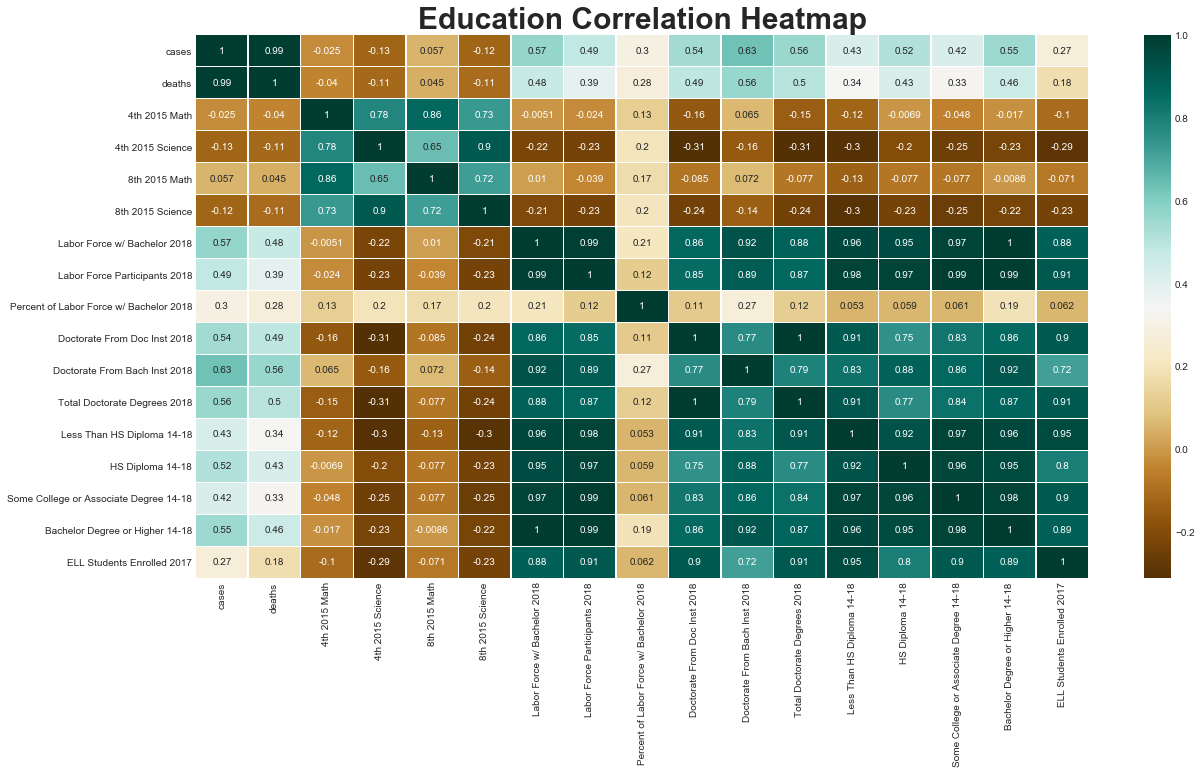

In [9]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Education Correlation Heatmap', fontweight = 'bold', fontsize = 30);

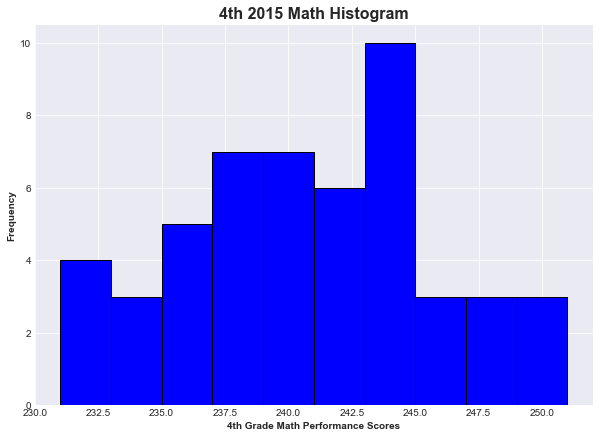

In [10]:
plt.style.use('seaborn-darkgrid')

LitDF['4th 2015 Math'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('4th 2015 Math Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('4th Grade Math Performance Scores', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

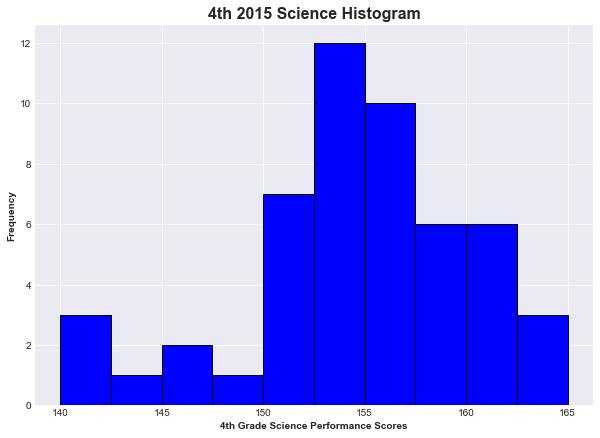

In [11]:
plt.style.use('seaborn-darkgrid')

LitDF['4th 2015 Science'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('4th 2015 Science Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('4th Grade Science Performance Scores', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

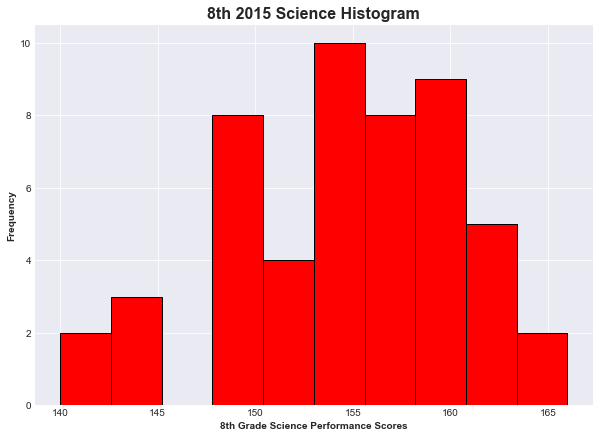

In [12]:
plt.style.use('seaborn-darkgrid')

LitDF['8th 2015 Science'].plot(kind = 'hist', color = 'red', edgecolor = 'black', figsize = (10,7))
plt.title('8th 2015 Science Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('8th Grade Science Performance Scores', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

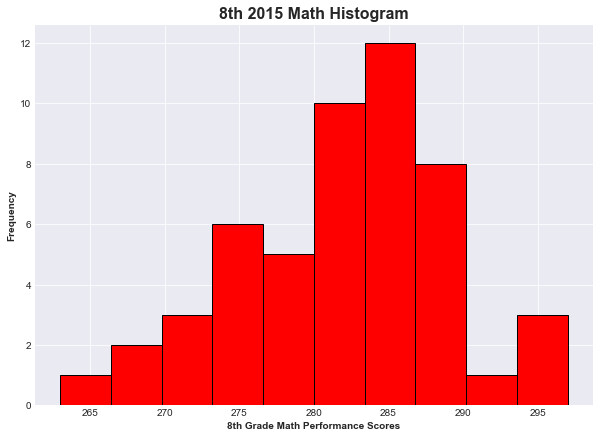

In [13]:
plt.style.use('seaborn-darkgrid')

LitDF['8th 2015 Math'].plot(kind = 'hist', color = 'red', edgecolor = 'black', figsize = (10,7))
plt.title('8th 2015 Math Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('8th Grade Math Performance Scores', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

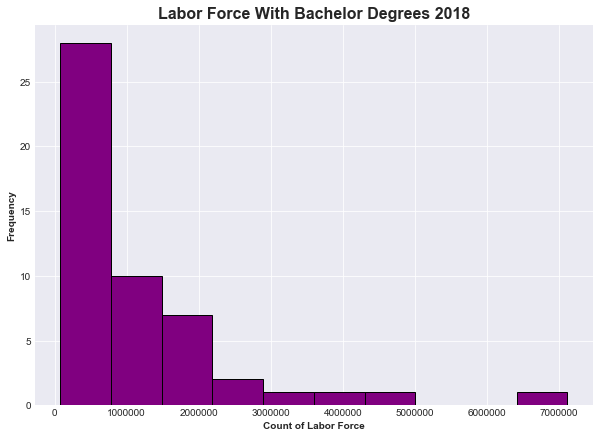

In [14]:
plt.style.use('seaborn-darkgrid')

LitDF['Labor Force w/ Bachelor 2018'].plot(kind = 'hist', color = 'purple', edgecolor = 'black', figsize = (10,7))
plt.title('Labor Force With Bachelor Degrees 2018', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of Labor Force', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

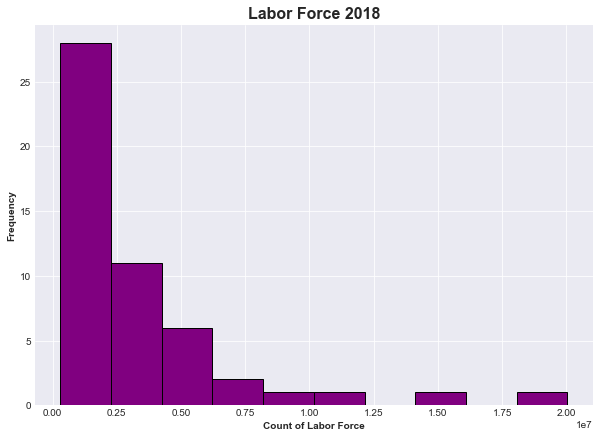

In [15]:
plt.style.use('seaborn-darkgrid')

LitDF['Labor Force Participants 2018'].plot(kind = 'hist', color = 'purple', edgecolor = 'black', figsize = (10,7))
plt.title('Labor Force 2018', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of Labor Force', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

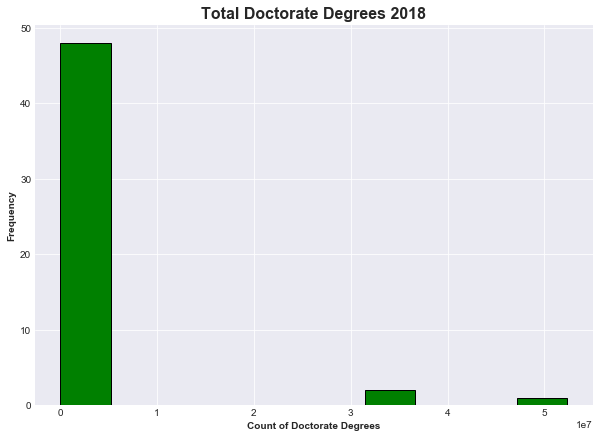

In [16]:
plt.style.use('seaborn-darkgrid')

LitDF['Total Doctorate Degrees 2018'].plot(kind = 'hist', color = 'green', edgecolor = 'black', figsize = (10,7))
plt.title('Total Doctorate Degrees 2018', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of Doctorate Degrees', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

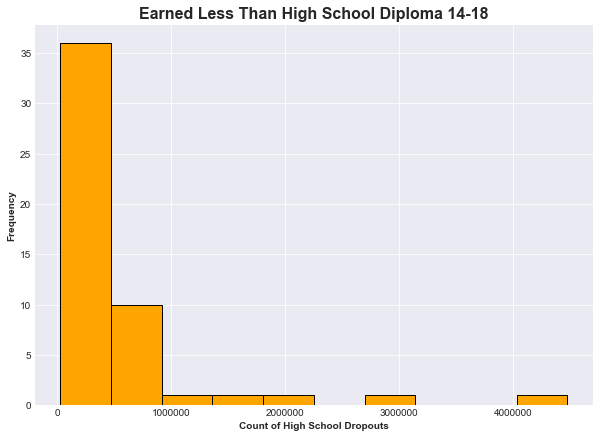

In [17]:
plt.style.use('seaborn-darkgrid')

LitDF['Less Than HS Diploma 14-18'].plot(kind = 'hist', color = 'orange', edgecolor = 'black', figsize = (10,7))
plt.title('Earned Less Than High School Diploma 14-18', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of High School Dropouts', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

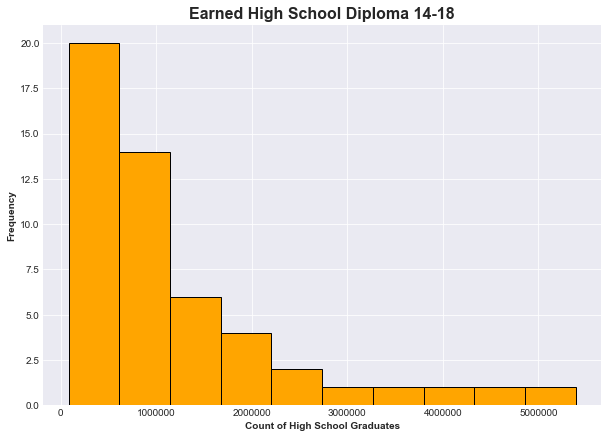

In [18]:
plt.style.use('seaborn-darkgrid')

LitDF['HS Diploma 14-18'].plot(kind = 'hist', color = 'orange', edgecolor = 'black', figsize = (10,7))
plt.title('Earned High School Diploma 14-18', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of High School Graduates', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

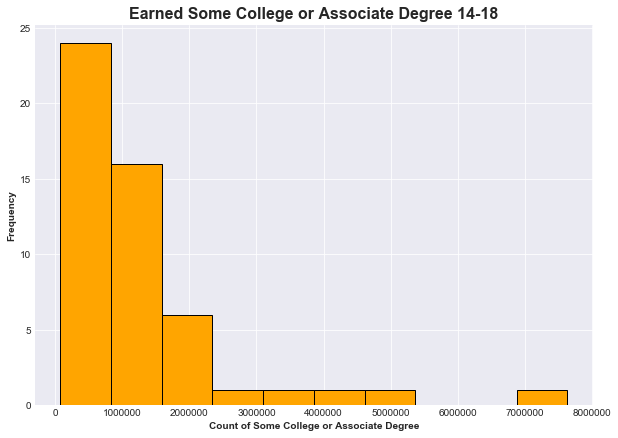

In [19]:
plt.style.use('seaborn-darkgrid')

LitDF['Some College or Associate Degree 14-18'].plot(kind = 'hist', color = 'orange', edgecolor = 'black', figsize = (10,7))
plt.title('Earned Some College or Associate Degree 14-18', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of Some College or Associate Degree', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

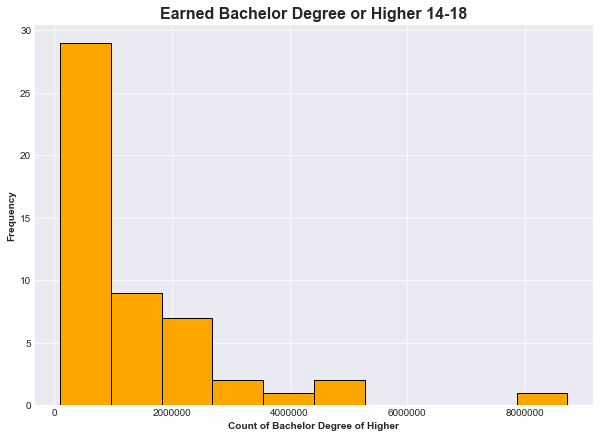

In [20]:
plt.style.use('seaborn-darkgrid')

LitDF['Bachelor Degree or Higher 14-18'].plot(kind = 'hist', color = 'orange', edgecolor = 'black', figsize = (10,7))
plt.title('Earned Bachelor Degree or Higher 14-18', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of Bachelor Degree of Higher', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

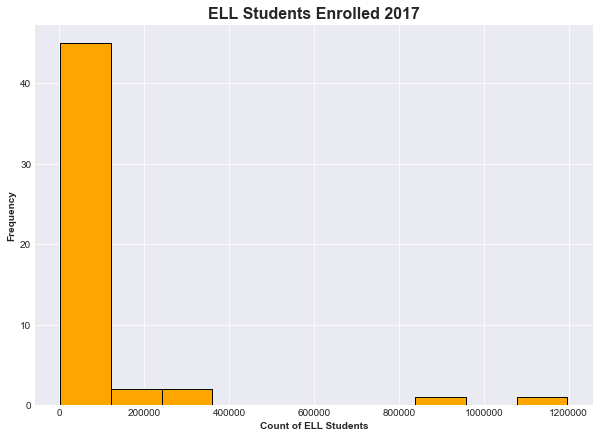

In [21]:
plt.style.use('seaborn-darkgrid')

LitDF['ELL Students Enrolled 2017'].plot(kind = 'hist', color = 'orange', edgecolor = 'black', figsize = (10,7))
plt.title('ELL Students Enrolled 2017', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of ELL Students', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

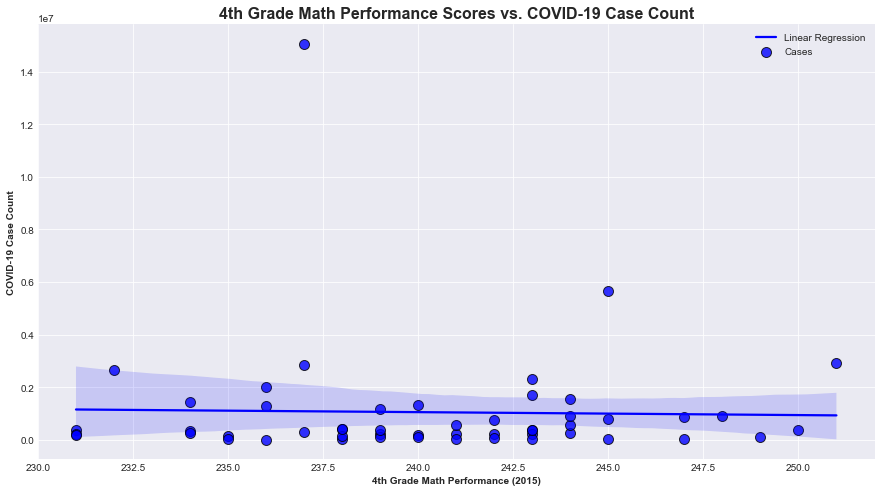

In [22]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '4th 2015 Math', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('4th Grade Math Performance Scores vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('4th Grade Math Performance (2015)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [23]:
model1 = sm.OLS(LitDF['cases'], LitDF['4th 2015 Math']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.183
Model:                            OLS   Adj. R-squared (uncentered):              0.167
Method:                 Least Squares   F-statistic:                              11.21
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                     0.00155
Time:                        13:50:56   Log-Likelihood:                         -817.81
No. Observations:                  51   AIC:                                      1638.
Df Residuals:                      50   BIC:                                      1640.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
4th 2015 Math  4389.7549   1310.887      3.349      0.002    1756.761    7022.749
==============================================================================
Omnibus:                       91.498   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1878.407
Skew:                           5.035   Prob(JB):                         0.00
Kurtosis:                      30.974   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

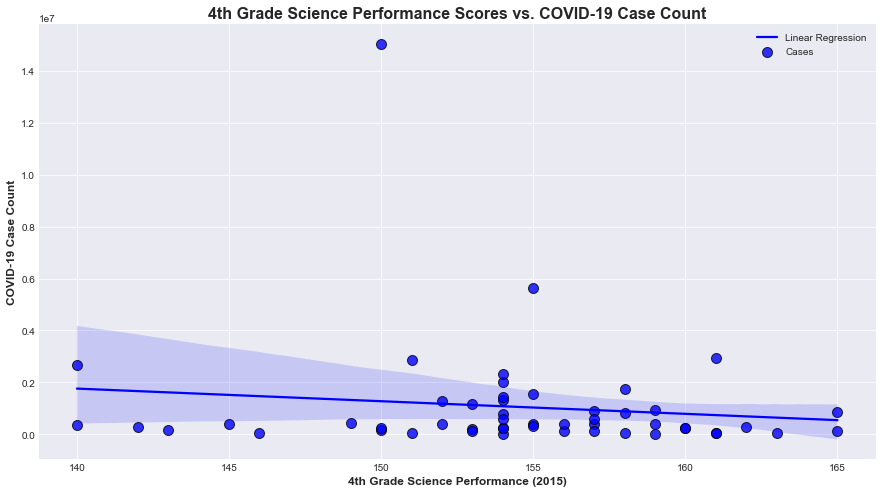

In [24]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '4th 2015 Science', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('4th Grade Science Performance Scores vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('4th Grade Science Performance (2015)', fontsize = 12, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 12, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [25]:
model2 = sm.OLS(LitDF['cases'], LitDF['4th 2015 Science']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.180
Model:                            OLS   Adj. R-squared (uncentered):              0.163
Method:                 Least Squares   F-statistic:                              10.96
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                     0.00173
Time:                        13:50:56   Log-Likelihood:                         -817.91
No. Observations:                  51   AIC:                                      1638.
Df Residuals:                      50   BIC:                                      1640.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
4th 2015 Science  6764.5736   2043.036      3.311      0.002    2661.015    1.09e+04
==============================================================================
Omnibus:                       91.328   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1864.235
Skew:                           5.023   Prob(JB):                         0.00
Kurtosis:                      30.864   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

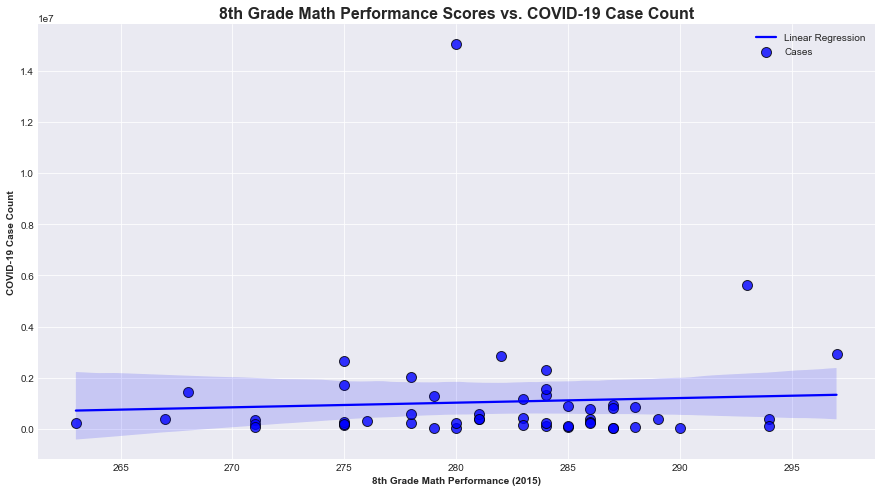

In [26]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '8th 2015 Math', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('8th Grade Math Performance Scores vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('8th Grade Math Performance (2015)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [27]:
model3 = sm.OLS(LitDF['cases'], LitDF['8th 2015 Math']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.185
Model:                            OLS   Adj. R-squared (uncentered):              0.168
Method:                 Least Squares   F-statistic:                              11.32
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                     0.00148
Time:                        13:50:57   Log-Likelihood:                         -817.76
No. Observations:                  51   AIC:                                      1638.
Df Residuals:                      50   BIC:                                      1639.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
8th 2015 Math  3758.4229   1116.893      3.365      0.001    1515.077    6001.769
==============================================================================
Omnibus:                       91.536   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1882.802
Skew:                           5.037   Prob(JB):                         0.00
Kurtosis:                      31.009   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

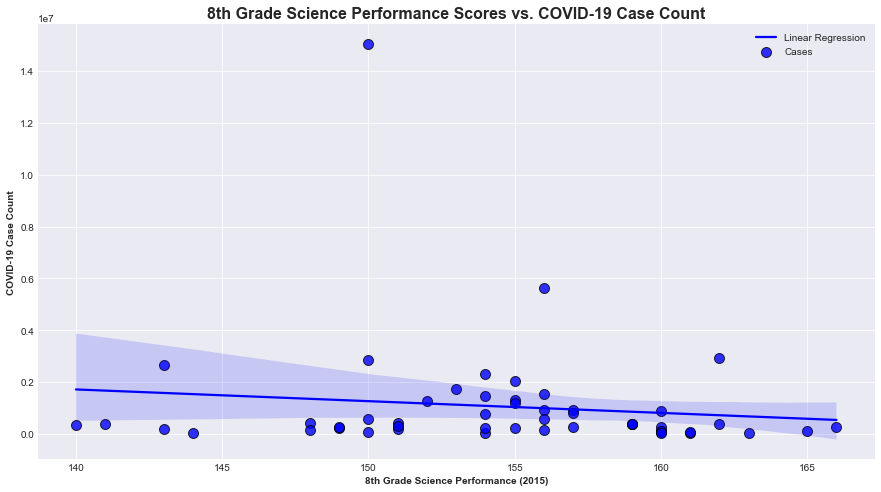

In [28]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '8th 2015 Science', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('8th Grade Science Performance Scores vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('8th Grade Science Performance (2015)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [29]:
model4 = sm.OLS(LitDF['cases'], LitDF['8th 2015 Science']).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.180
Model:                            OLS   Adj. R-squared (uncentered):              0.163
Method:                 Least Squares   F-statistic:                              10.96
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                     0.00173
Time:                        13:50:58   Log-Likelihood:                         -817.91
No. Observations:                  51   AIC:                                      1638.
Df Residuals:                      50   BIC:                                      1640.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
8th 2015 Science  6757.6577   2041.445      3.310      0.002    2657.295    1.09e+04
==============================================================================
Omnibus:                       91.318   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1864.079
Skew:                           5.022   Prob(JB):                         0.00
Kurtosis:                      30.863   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

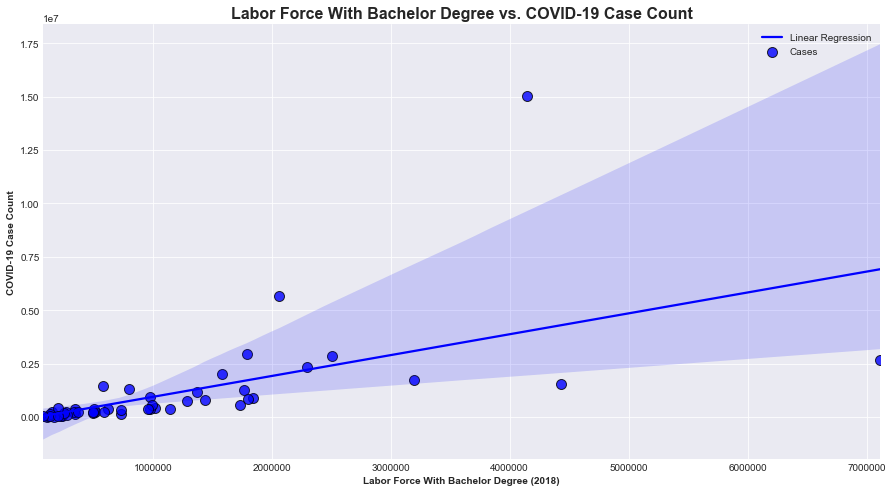

In [30]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Labor Force w/ Bachelor 2018', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Labor Force With Bachelor Degree vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Labor Force With Bachelor Degree (2018)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [31]:
model5 = sm.OLS(LitDF['cases'], LitDF['Labor Force w/ Bachelor 2018']).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.447
Model:                            OLS   Adj. R-squared (uncentered):              0.436
Method:                 Least Squares   F-statistic:                              40.40
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                    6.10e-08
Time:                        13:50:58   Log-Likelihood:                         -807.86
No. Observations:                  51   AIC:                                      1618.
Df Residuals:                      50   BIC:                                      1620.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Labor Force w/ Bachelor 2018     0.9652      0.152      6.356      0.000       0.660       1.270
==============================================================================
Omnibus:                       80.693   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1363.094
Skew:                           4.155   Prob(JB):                    1.02e-296
Kurtosis:                      26.925   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

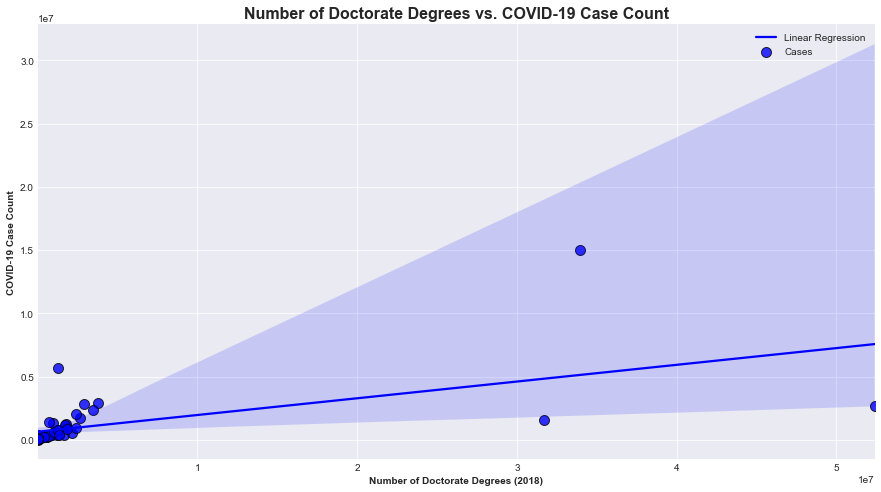

In [32]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Total Doctorate Degrees 2018', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Number of Doctorate Degrees vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Number of Doctorate Degrees (2018)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [33]:
model6 = sm.OLS(LitDF['cases'], LitDF['Total Doctorate Degrees 2018']).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.377
Model:                            OLS   Adj. R-squared (uncentered):              0.364
Method:                 Least Squares   F-statistic:                              30.25
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                    1.30e-06
Time:                        13:50:59   Log-Likelihood:                         -810.90
No. Observations:                  51   AIC:                                      1624.
Df Residuals:                      50   BIC:                                      1626.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Total Doctorate Degrees 2018     0.1530      0.028      5.500      0.000       0.097       0.209
==============================================================================
Omnibus:                       46.532   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.620
Skew:                           2.019   Prob(JB):                     6.67e-80
Kurtosis:                      15.461   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

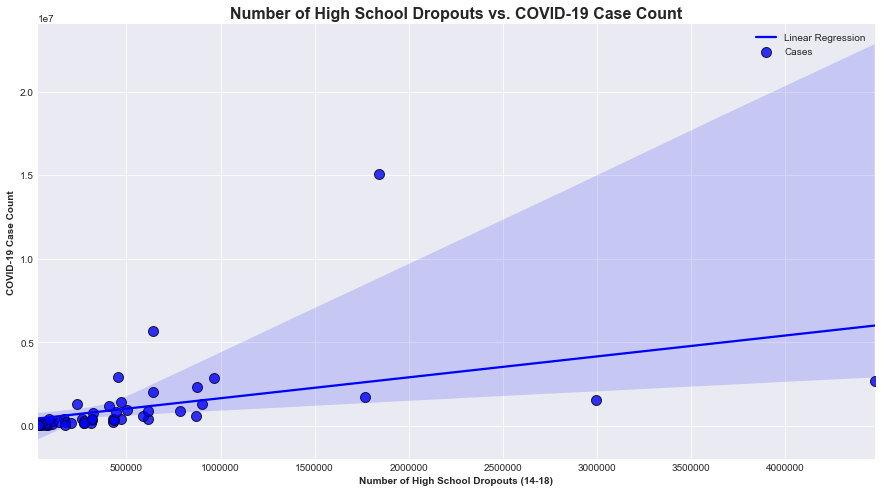

In [34]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Less Than HS Diploma 14-18', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Number of High School Dropouts vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Number of High School Dropouts (14-18)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [35]:
model7 = sm.OLS(LitDF['cases'], LitDF['Less Than HS Diploma 14-18']).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.317
Model:                            OLS   Adj. R-squared (uncentered):              0.303
Method:                 Least Squares   F-statistic:                              23.21
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                    1.39e-05
Time:                        13:50:59   Log-Likelihood:                         -813.24
No. Observations:                  51   AIC:                                      1628.
Df Residuals:                      50   BIC:                                      1630.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Less Than HS Diploma 14-18     1.4923      0.310      4.818      0.000       0.870       2.114
==============================================================================
Omnibus:                       79.393   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1236.126
Skew:                           4.099   Prob(JB):                    3.79e-269
Kurtosis:                      25.683   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

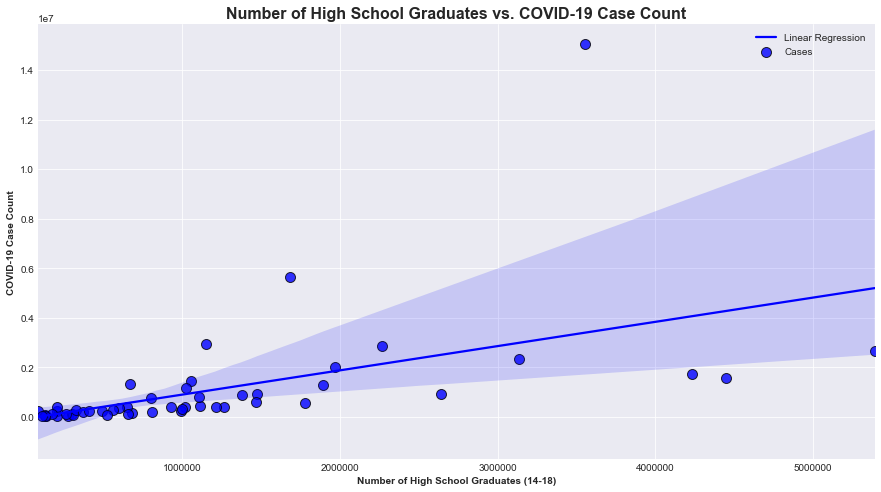

In [36]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'HS Diploma 14-18', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Number of High School Graduates vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Number of High School Graduates (14-18)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [37]:
model8 = sm.OLS(LitDF['cases'], LitDF['HS Diploma 14-18']).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.401
Model:                            OLS   Adj. R-squared (uncentered):              0.389
Method:                 Least Squares   F-statistic:                              33.41
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                    4.80e-07
Time:                        13:51:00   Log-Likelihood:                         -809.92
No. Observations:                  51   AIC:                                      1622.
Df Residuals:                      50   BIC:                                      1624.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
HS Diploma 14-18     0.9443      0.163      5.780      0.000       0.616       1.272
==============================================================================
Omnibus:                       86.328   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1570.228
Skew:                           4.624   Prob(JB):                         0.00
Kurtosis:                      28.562   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

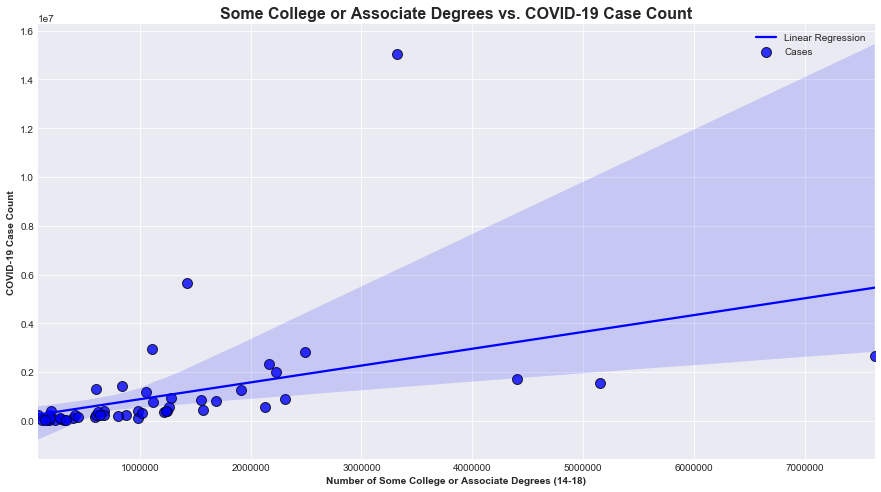

In [38]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Some College or Associate Degree 14-18', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Some College or Associate Degrees vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Number of Some College or Associate Degrees (14-18)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [39]:
model9 = sm.OLS(LitDF['cases'], LitDF['Some College or Associate Degree 14-18']).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.327
Model:                            OLS   Adj. R-squared (uncentered):              0.314
Method:                 Least Squares   F-statistic:                              24.33
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                    9.37e-06
Time:                        13:51:00   Log-Likelihood:                         -812.85
No. Observations:                  51   AIC:                                      1628.
Df Residuals:                      50   BIC:                                      1630.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Some College or Associate Degree 14-18     0.7617      0.154      4.933      0.000       0.452       1.072
==============================================================================
Omnibus:                       86.460   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1576.704
Skew:                           4.634   Prob(JB):                         0.00
Kurtosis:                      28.614   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

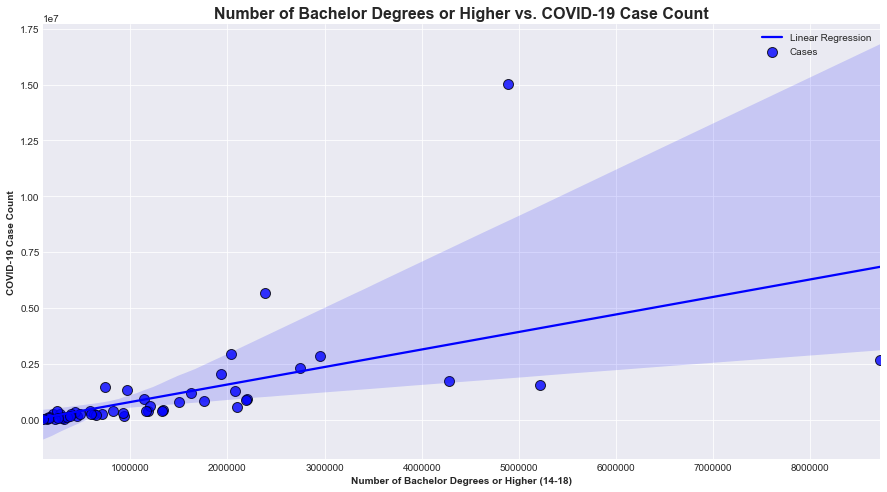

In [40]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Bachelor Degree or Higher 14-18', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Number of Bachelor Degrees or Higher vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Number of Bachelor Degrees or Higher (14-18)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [41]:
model10 = sm.OLS(LitDF['cases'], LitDF['Bachelor Degree or Higher 14-18']).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.433
Model:                            OLS   Adj. R-squared (uncentered):              0.422
Method:                 Least Squares   F-statistic:                              38.17
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                    1.16e-07
Time:                        13:51:01   Log-Likelihood:                         -808.50
No. Observations:                  51   AIC:                                      1619.
Df Residuals:                      50   BIC:                                      1621.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Bachelor Degree or Higher 14-18     0.7836      0.127      6.178      0.000       0.529       1.038
==============================================================================
Omnibus:                       81.248   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1378.150
Skew:                           4.202   Prob(JB):                    5.48e-300
Kurtosis:                      27.040   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

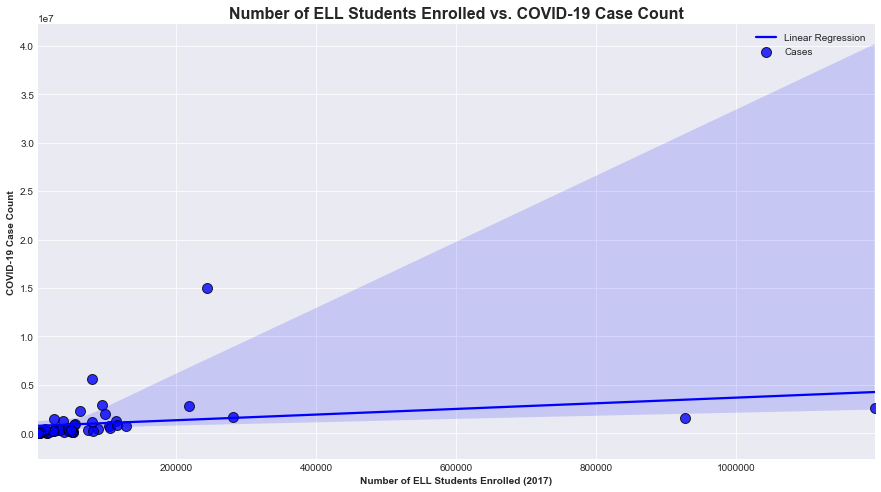

In [42]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'ELL Students Enrolled 2017', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Number of ELL Students Enrolled vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Number of ELL Students Enrolled (2017)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [43]:
model11 = sm.OLS(LitDF['cases'], LitDF['ELL Students Enrolled 2017']).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.162
Model:                            OLS   Adj. R-squared (uncentered):              0.145
Method:                 Least Squares   F-statistic:                              9.681
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                     0.00307
Time:                        13:51:01   Log-Likelihood:                         -818.45
No. Observations:                  51   AIC:                                      1639.
Df Residuals:                      50   BIC:                                      1641.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
ELL Students Enrolled 2017     4.3713      1.405      3.112      0.003       1.550       7.193
==============================================================================
Omnibus:                       86.987   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1609.238
Skew:                           4.674   Prob(JB):                         0.00
Kurtosis:                      28.883   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
model12 = sm.OLS(LitDF['cases'], LitDF[['4th 2015 Math', '4th 2015 Science', '8th 2015 Math',
                                       '8th 2015 Science', 'Labor Force w/ Bachelor 2018',
                                       'Total Doctorate Degrees 2018', 'Less Than HS Diploma 14-18',
                                       'HS Diploma 14-18', 'Some College or Associate Degree 14-18',
                                       'Bachelor Degree or Higher 14-18', 'ELL Students Enrolled 2017']]).fit()
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                              27.34
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                    3.51e-15
Time:                        13:51:01   Log-Likelihood:                         -768.34
No. Observations:                  51   AIC:                                      1559.
Df Residuals:                      40   BIC:                                      1580.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
4th 2015 Math                          -1.555e+04   6.75e+04     -0.230      0.819   -1.52e+05    1.21e+05
4th 2015 Science                          1.1e+04   7.23e+04      0.152      0.880   -1.35e+05    1.57e+05
8th 2015 Math                            2.91e+04   5.31e+04      0.548      0.587   -7.82e+04    1.36e+05
8th 2015 Science                       -3.909e+04    6.8e+04     -0.575      0.569   -1.77e+05    9.83e+04
Labor Force w/ Bachelor 2018               0.8703      2.974      0.293      0.771      -5.141       6.882
Total Doctorate Degrees 2018               0.2929      0.057      5.184      0.000       0.179       0.407
Less Than HS Diploma 14-18                -1.7547      1.994     -0.880      0.384      -5.786       2.276
HS Diploma 14-18                           1.3862      0.728      1.903      0.064      -0.086       2.858
Some College or Associate Degree 14-18    -1.9550      1.002     -1.951      0.058      -3.980       0.070
Bachelor Degree or Higher 14-18            1.4630      2.676      0.547      0.588      -3.945       6.871
ELL Students Enrolled 2017               -12.3652      3.720     -3.324      0.002     -19.883      -4.847
==============================================================================
Omnibus:                        5.811   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                7.766
Skew:                          -0.193   Prob(JB):                       0.0206
Kurtosis:                       4.872   Cond. No.                     8.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

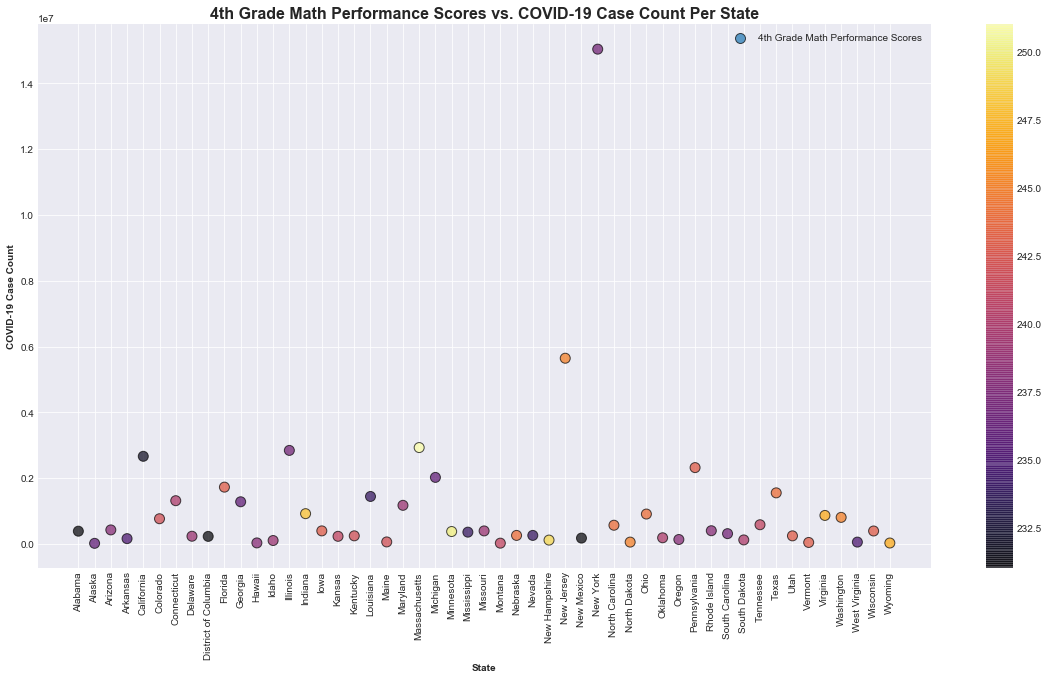

In [45]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['4th 2015 Math'], cmap = 'inferno')
plt.title('4th Grade Math Performance Scores vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['4th Grade Math Performance Scores'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

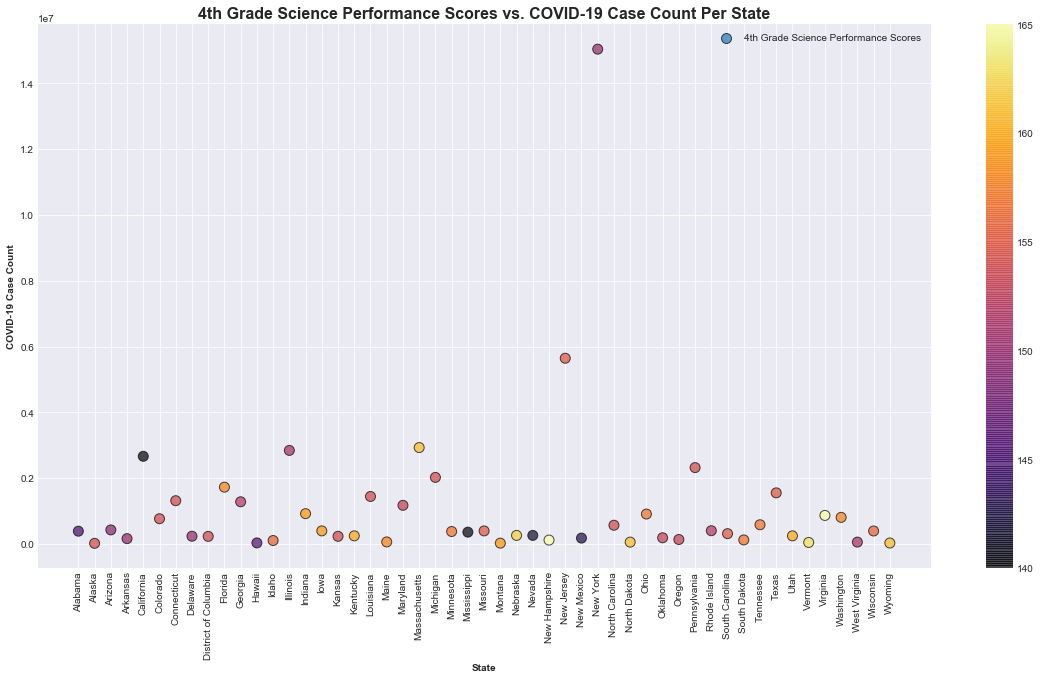

In [46]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['4th 2015 Science'], cmap = 'inferno')
plt.title('4th Grade Science Performance Scores vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['4th Grade Science Performance Scores'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

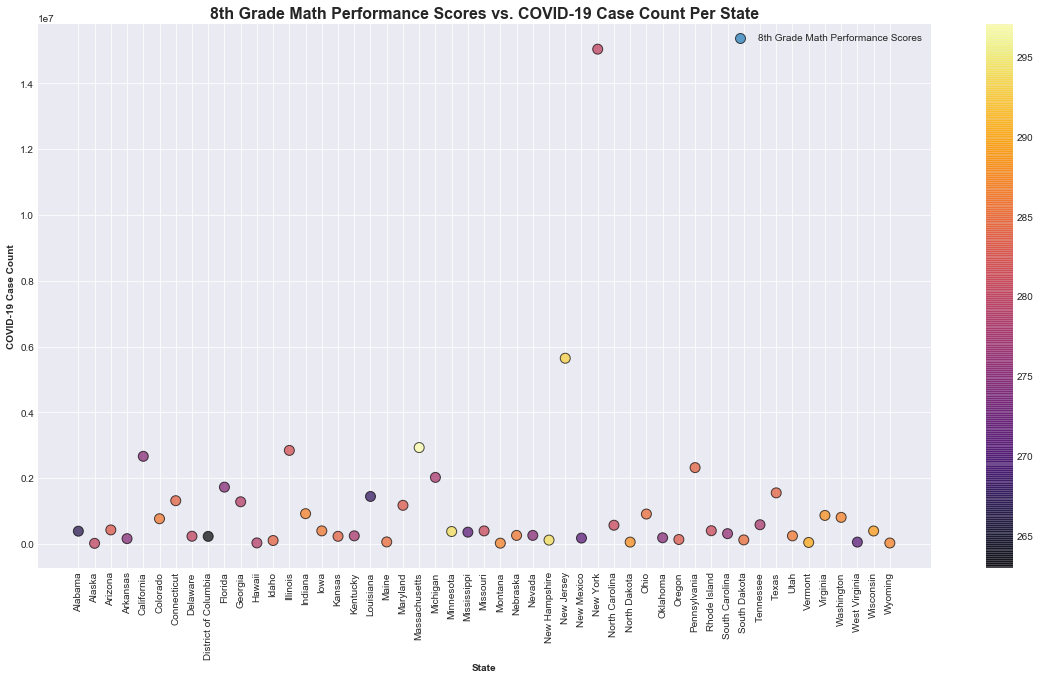

In [47]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['8th 2015 Math'], cmap = 'inferno')
plt.title('8th Grade Math Performance Scores vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['8th Grade Math Performance Scores'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

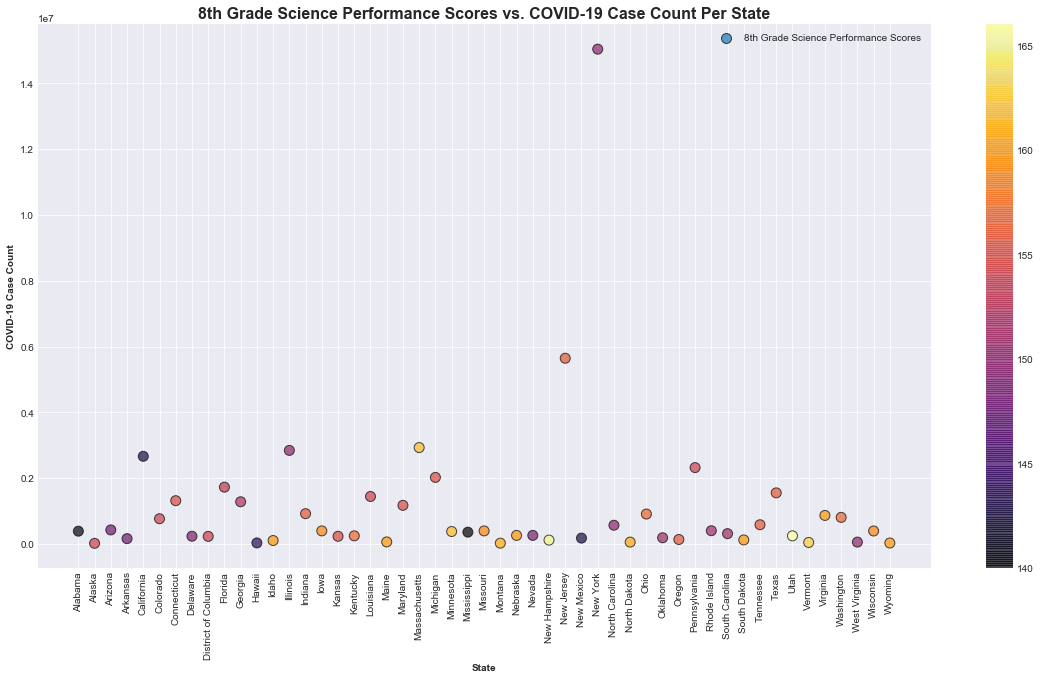

In [48]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['8th 2015 Science'], cmap = 'inferno')
plt.title('8th Grade Science Performance Scores vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['8th Grade Science Performance Scores'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

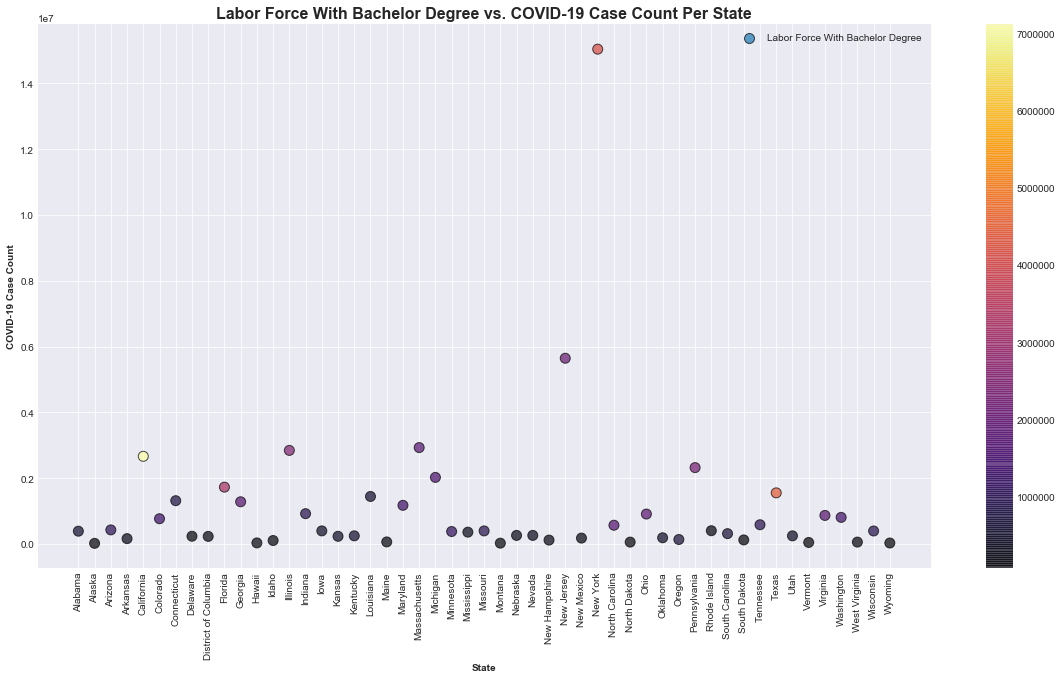

In [49]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['Labor Force w/ Bachelor 2018'], cmap = 'inferno')
plt.title('Labor Force With Bachelor Degree vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Labor Force With Bachelor Degree'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

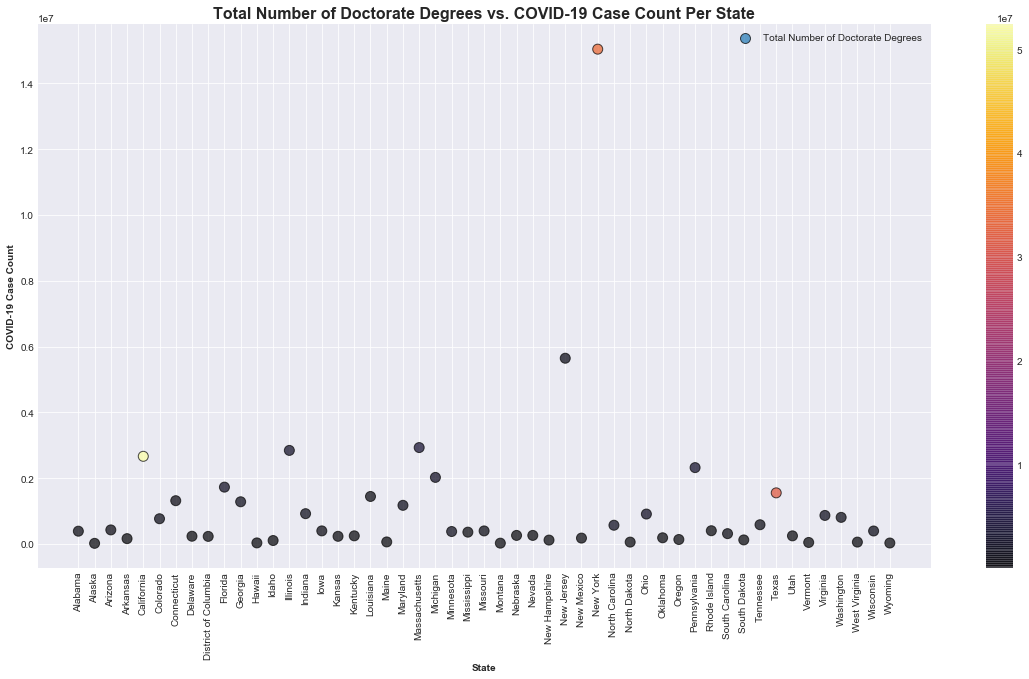

In [50]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['Total Doctorate Degrees 2018'], cmap = 'inferno')
plt.title('Total Number of Doctorate Degrees vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Total Number of Doctorate Degrees'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

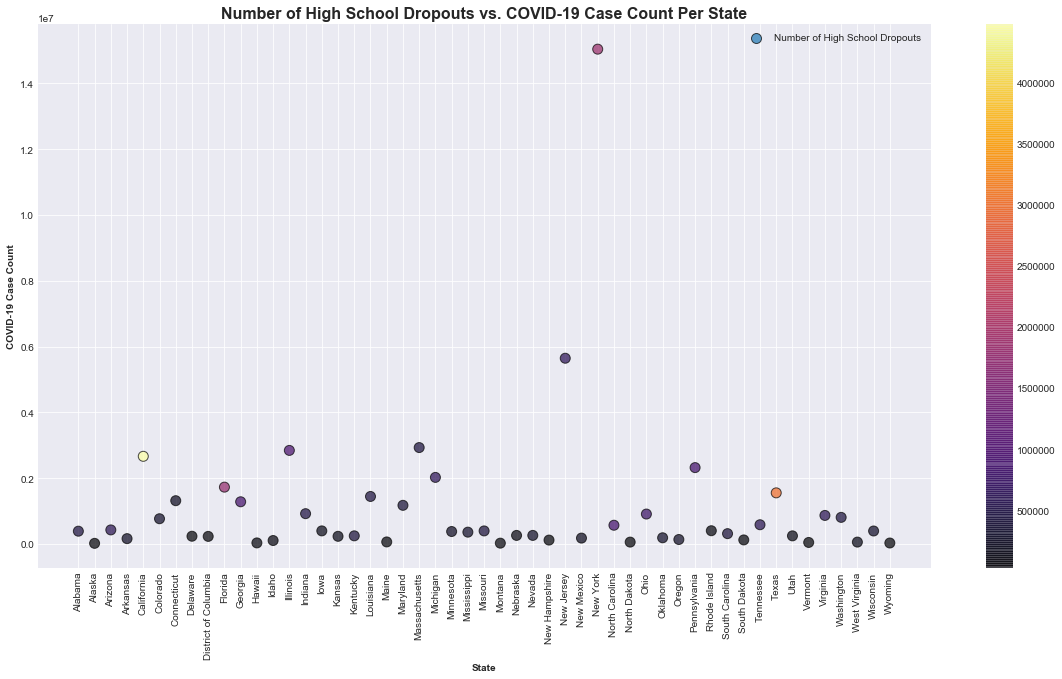

In [51]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['Less Than HS Diploma 14-18'], cmap = 'inferno')
plt.title('Number of High School Dropouts vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Number of High School Dropouts'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

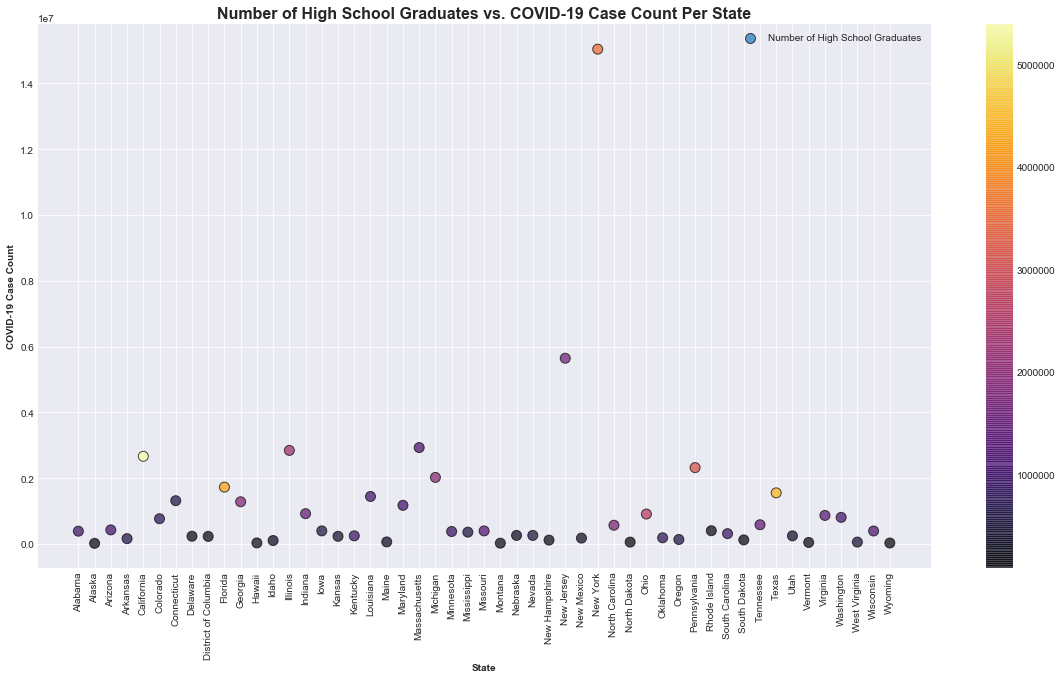

In [52]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['HS Diploma 14-18'], cmap = 'inferno')
plt.title('Number of High School Graduates vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Number of High School Graduates'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

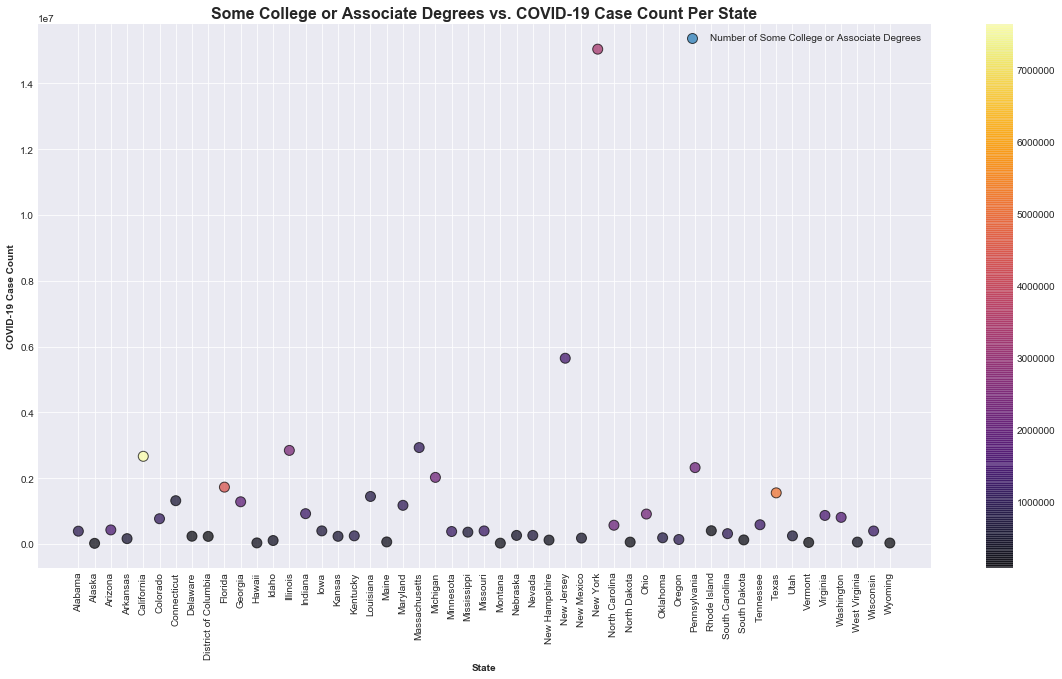

In [53]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['Some College or Associate Degree 14-18'], cmap = 'inferno')
plt.title('Some College or Associate Degrees vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Number of Some College or Associate Degrees'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

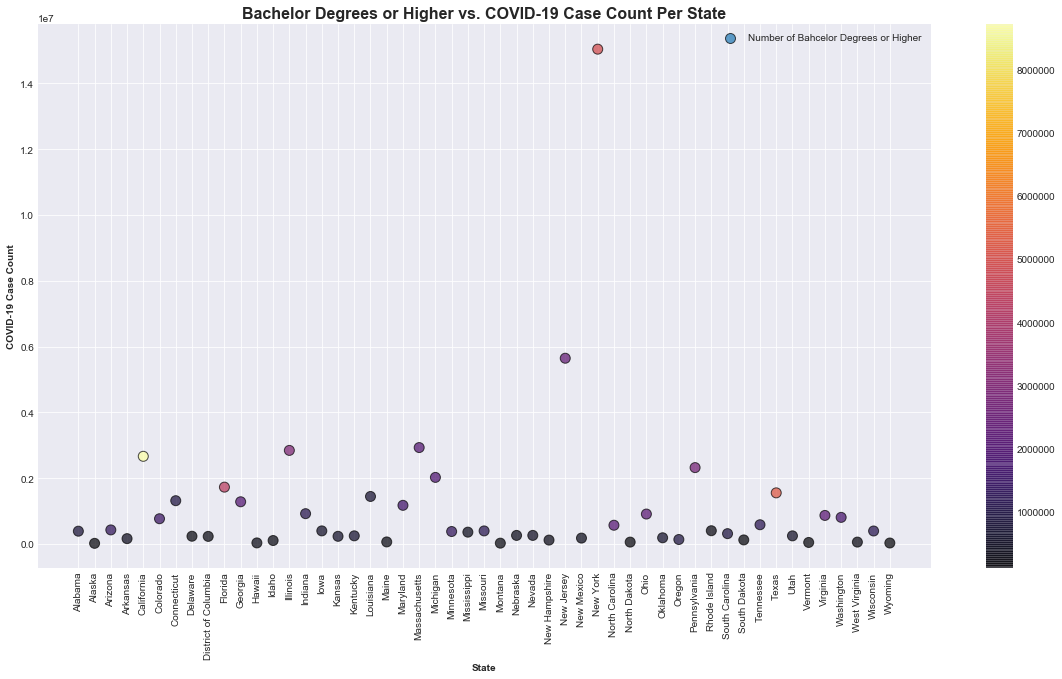

In [54]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['Bachelor Degree or Higher 14-18'], cmap = 'inferno')
plt.title('Bachelor Degrees or Higher vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Number of Bahcelor Degrees or Higher'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

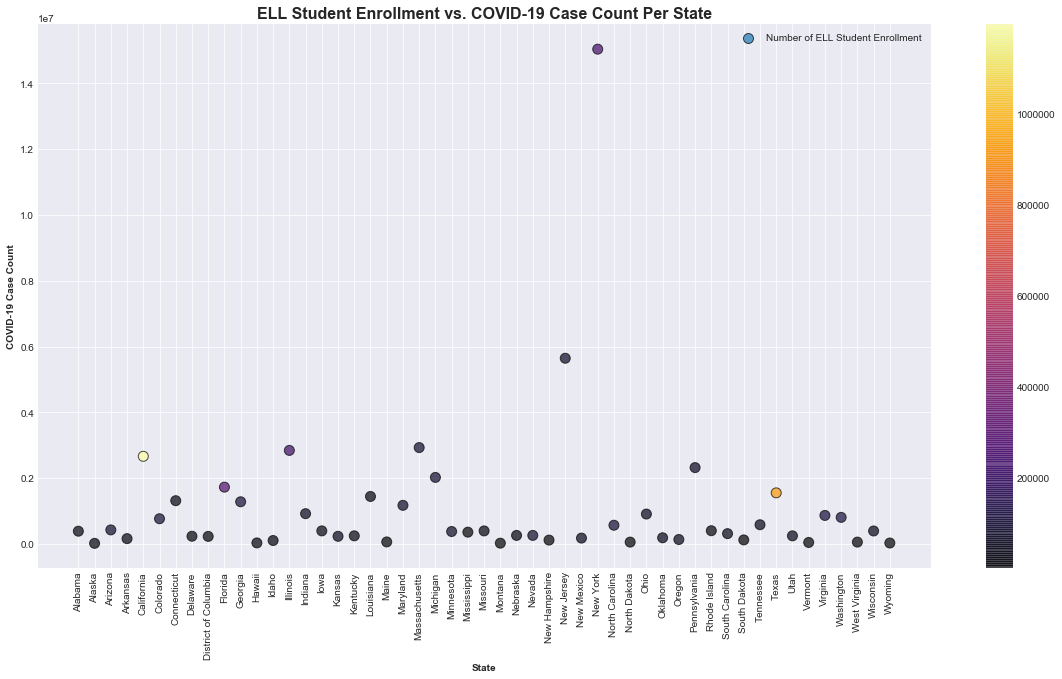

In [55]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['ELL Students Enrolled 2017'], cmap = 'inferno')
plt.title('ELL Student Enrollment vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Number of ELL Student Enrollment'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

In [56]:
LitDFLogReg = LitDF

CasesMean = LitDFLogReg['cases'].mean()

Cases = list(LitDFLogReg['cases'])

Cases_Avg = []

for x in range(len(Cases)):
    if Cases[x] > CasesMean:
        Cases_Avg.append(1)
    elif Cases[x] <= CasesMean:
        Cases_Avg.append(0)
        
LitDFLogReg['Cases_Avg'] = Cases_Avg
        
LitDFLogReg = LitDFLogReg[['State', 'cases', 'deaths', 'Cases_Avg', '4th 2015 Math',
                                '4th 2015 Science', '8th 2015 Math',
                                '8th 2015 Science', 'Labor Force w/ Bachelor 2018',
                                'Labor Force Participants 2018', 'Percent of Labor Force w/ Bachelor 2018',
                                'Doctorate From Doc Inst 2018', 'Doctorate From Bach Inst 2018', 'Total Doctorate Degrees 2018',
                          'Less Than HS Diploma 14-18', 'HS Diploma 14-18', 'Some College or Associate Degree 14-18',
                          'Bachelor Degree or Higher 14-18', 'ELL Students Enrolled 2017']]

LitDFLogReg

State     cases   deaths  Cases_Avg  4th 2015 Math  \
0                Alabama    387786    14345          0            231   
1                 Alaska     18316      367          0            236   
2                Arizona    426614    18857          0            238   
3               Arkansas    161569     3301          0            235   
4             California   2664110   102387          1            232   
5               Colorado    766512    37828          0            242   
6            Connecticut   1314995   104185          1            240   
7               Delaware    234327     7813          0            239   
8   District of Columbia    229466    10822          0            231   
9                Florida   1726811    63147          1            243   
10               Georgia   1282091    54209          1            236   
11                Hawaii     31433      681          0            238   
12                 Idaho    103987     2828          0            239   
13              Illinois   2843621   122000          1            237   
14               Indiana    920434    53042          0            248   
15                  Iowa    396980     9203          0            243   
16                Kansas    231885     6527          0            241   
17              Kentucky    246480    11851          0            242   
18             Louisiana   1443404    90609          1            234   
19                 Maine     61284     2451          0            242   
20              Maryland   1173802    56126          1            239   
21         Massachusetts   2929874   167711          1            251   
22              Michigan   2023047   171867          1            236   
23             Minnesota    377850    18934          0            250   
24           Mississippi    358459    15047          0            234   
25              Missouri    395952    17924          0            239   
26               Montana     23875      676          0            241   
27              Nebraska    259429     3535          0            244   
28                Nevada    259808    11975          0            234   
29         New Hampshire    117245     4507          0            249   
30            New Jersey   5645458   332869          1            245   
31            New Mexico    177827     6867          0            231   
32              New York  15041806  1081194          1            237   
33        North Carolina    568719    19258          0            244   
34          North Dakota     55932     1219          0            245   
35                  Ohio    908834    47879          0            244   
36              Oklahoma    187462    10394          0            240   
37                Oregon    134979     5067          0            238   
38          Pennsylvania   2320771   127278          1            243   
39          Rhode Island    401931    14251          0            238   
40        South Carolina    313173    11859          0            237   
41          South Dakota    122292     1121          0            240   
42             Tennessee    583792    10198          0            241   
43                 Texas   1553075    41267          1            244   
44                  Utah    245859     2472          0            243   
45               Vermont     45230     2320          0            243   
46              Virginia    866807    28754          0            247   
47            Washington    807848    42371          0            245   
48         West Virginia     56158     1950          0            235   
49             Wisconsin    393823    15587          0            243   
50               Wyoming     28407      281          0            247   

    4th 2015 Science  8th 2015 Math  8th 2015 Science  \
0                145            267               141   
1                154            280               154   
2                149            283               1

In [57]:
test_len = int(0.25 * len(LitDFLogReg))
train_len = len(LitDFLogReg) - test_len
print('Train Set Len: ' + str(train_len))
print('Test Set Len: ' + str(test_len))

train = LitDFLogReg[:train_len]
test = LitDFLogReg[train_len:]
print('Train Set Shape: ' + str(train.shape))
print('Test Set Shape: ' + str(test.shape))

Train Set Len: 39
Test Set Len: 12
Train Set Shape: (39, 19)
Test Set Shape: (12, 19)


In [58]:
features_list = ['4th 2015 Math']
    
target = 'Cases_Avg'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

LogRegModel = LogisticRegression()
LogRegModel.fit(X_train_scaled, y_train)

train_predictions = LogRegModel.predict(X_train_scaled)
test_predictions = LogRegModel.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 0.08333333333333333
MSE Value: 0.08333333333333333
RMS Value: 0.28867513459481287
R2 Score: -0.09090909090909127


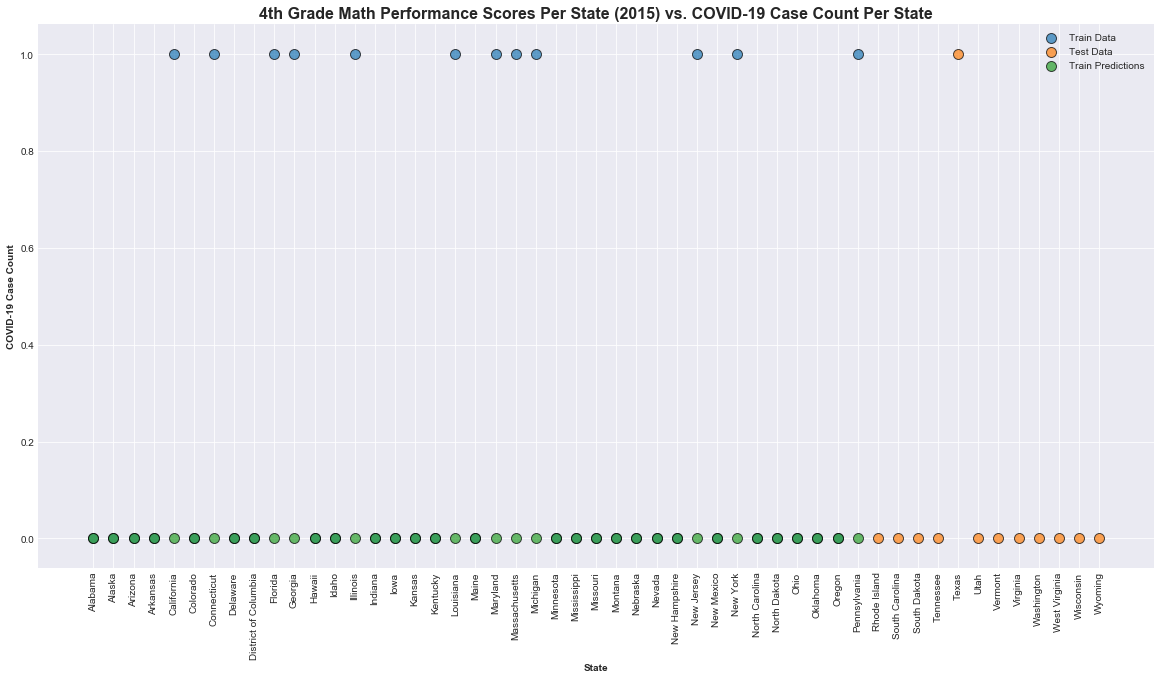

In [59]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('4th Grade Math Performance Scores Per State (2015) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

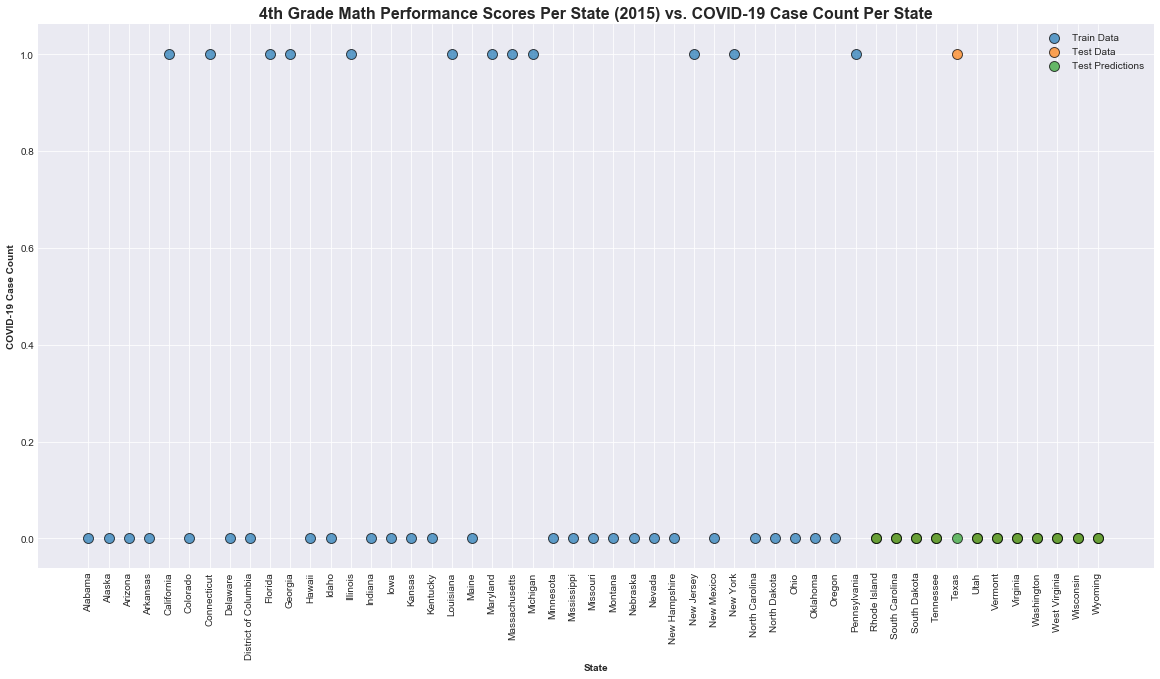

In [60]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('4th Grade Math Performance Scores Per State (2015) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [61]:
features_list = ['4th 2015 Science']
    
target = 'Cases_Avg'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

LogRegModel = LogisticRegression()
LogRegModel.fit(X_train_scaled, y_train)

train_predictions = LogRegModel.predict(X_train_scaled)
test_predictions = LogRegModel.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 0.08333333333333333
MSE Value: 0.08333333333333333
RMS Value: 0.28867513459481287
R2 Score: -0.09090909090909127


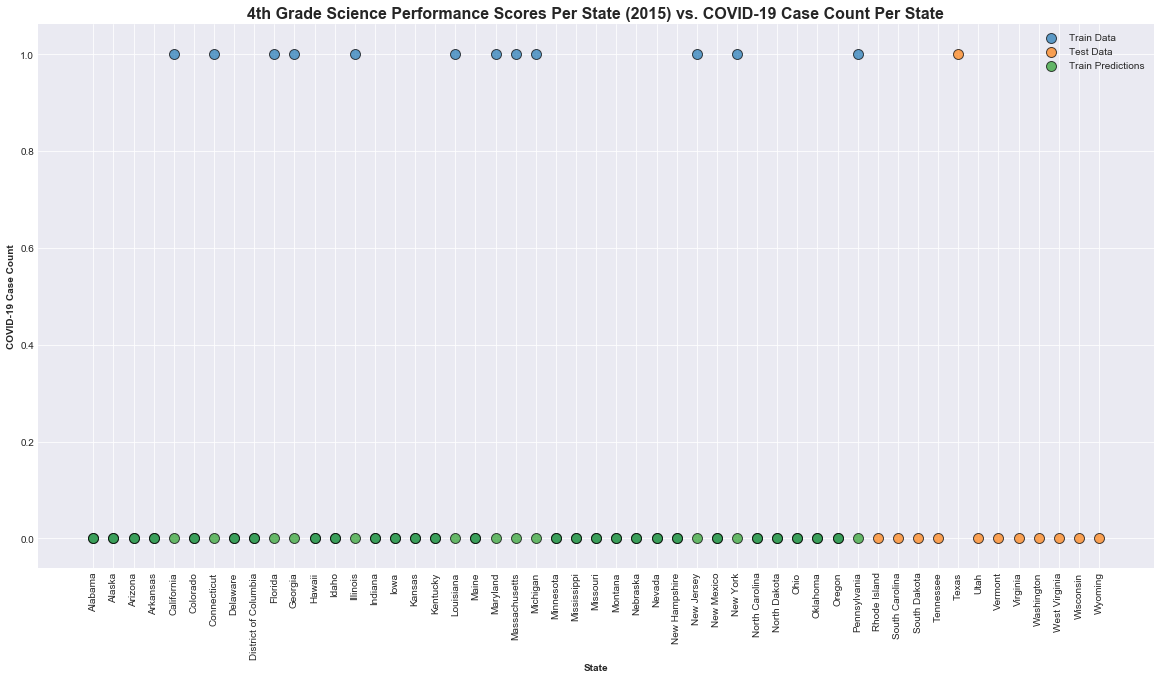

In [62]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('4th Grade Science Performance Scores Per State (2015) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

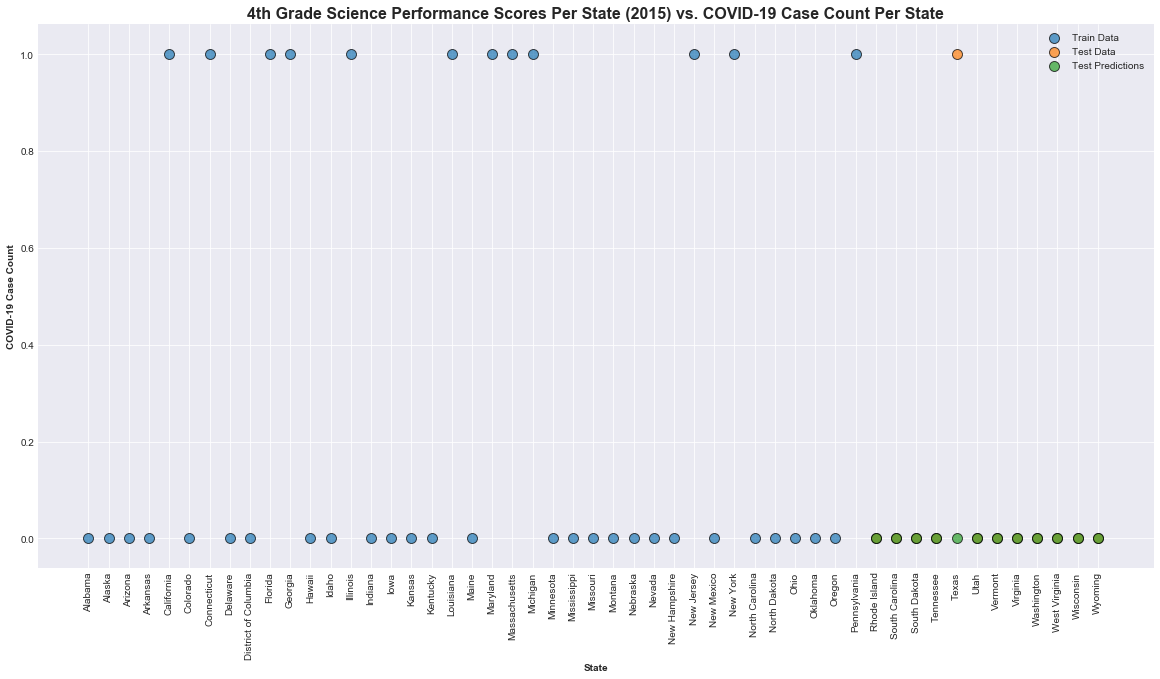

In [63]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('4th Grade Science Performance Scores Per State (2015) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [64]:
features_list = ['8th 2015 Math']
    
target = 'Cases_Avg'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

LogRegModel = LogisticRegression()
LogRegModel.fit(X_train_scaled, y_train)

train_predictions = LogRegModel.predict(X_train_scaled)
test_predictions = LogRegModel.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 0.08333333333333333
MSE Value: 0.08333333333333333
RMS Value: 0.28867513459481287
R2 Score: -0.09090909090909127


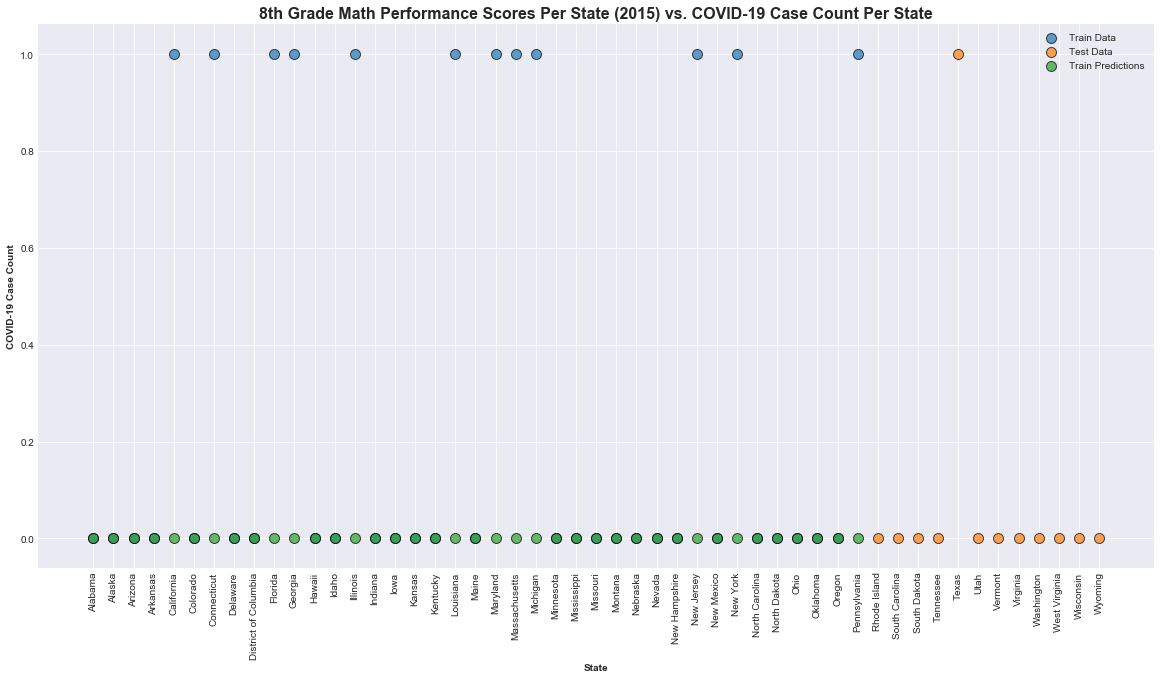

In [65]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('8th Grade Math Performance Scores Per State (2015) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

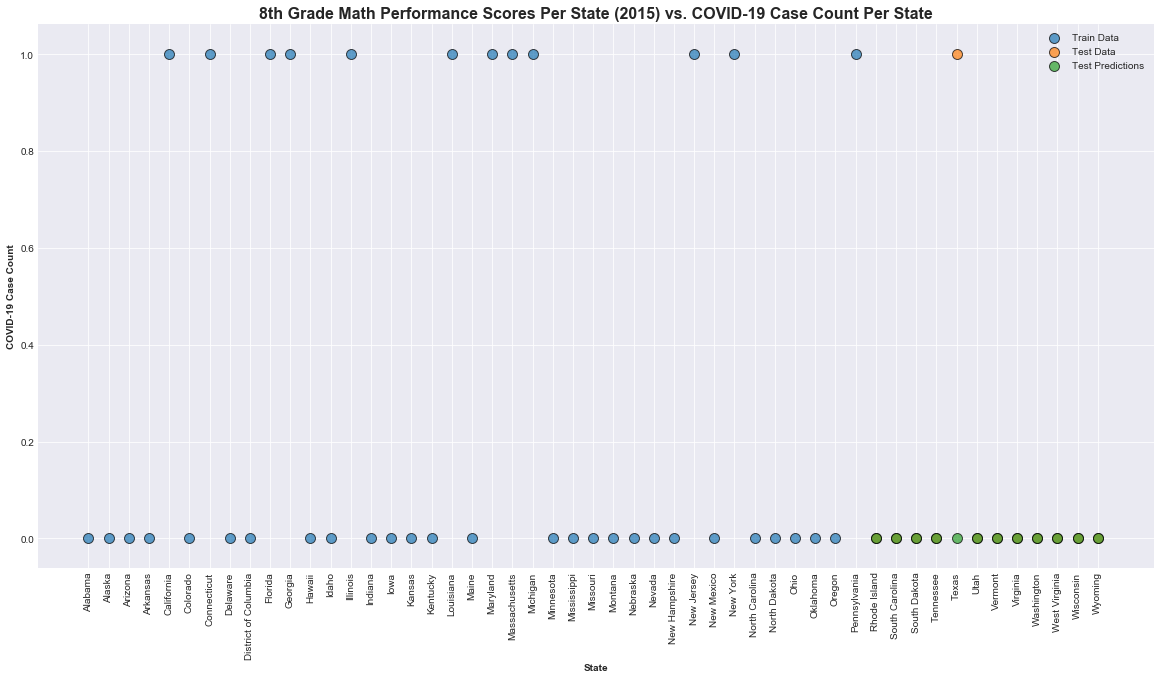

In [66]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('8th Grade Math Performance Scores Per State (2015) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [67]:
features_list = ['8th 2015 Science']
    
target = 'Cases_Avg'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

LogRegModel = LogisticRegression()
LogRegModel.fit(X_train_scaled, y_train)

train_predictions = LogRegModel.predict(X_train_scaled)
test_predictions = LogRegModel.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 0.08333333333333333
MSE Value: 0.08333333333333333
RMS Value: 0.28867513459481287
R2 Score: -0.09090909090909127


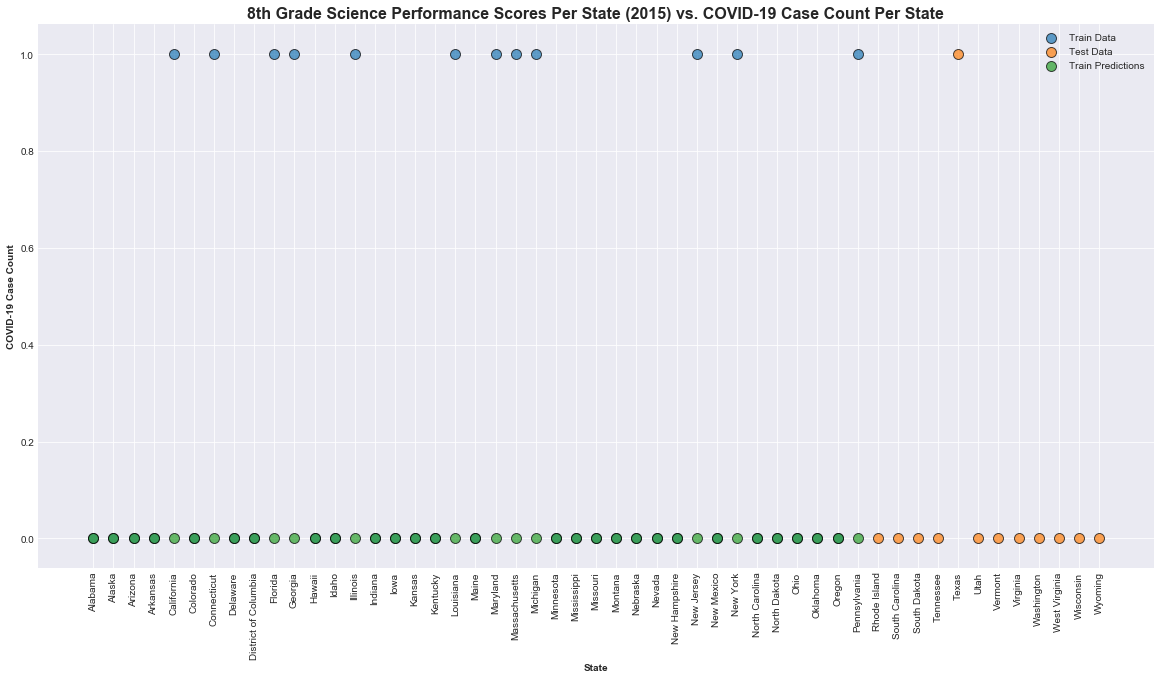

In [68]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('8th Grade Science Performance Scores Per State (2015) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

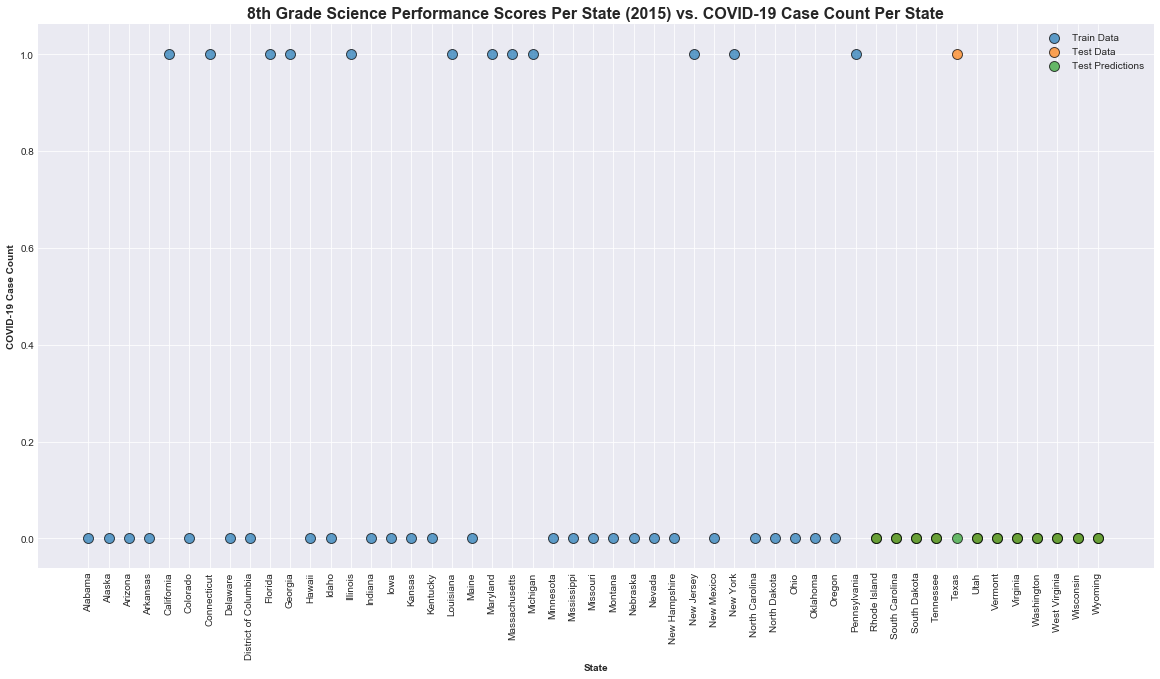

In [69]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('8th Grade Science Performance Scores Per State (2015) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [70]:
features_list = ['Labor Force w/ Bachelor 2018']
    
target = 'Cases_Avg'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

LogRegModel = LogisticRegression()
LogRegModel.fit(X_train_scaled, y_train)

train_predictions = LogRegModel.predict(X_train_scaled)
test_predictions = LogRegModel.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 0.08333333333333333
MSE Value: 0.08333333333333333
RMS Value: 0.28867513459481287
R2 Score: -0.09090909090909127


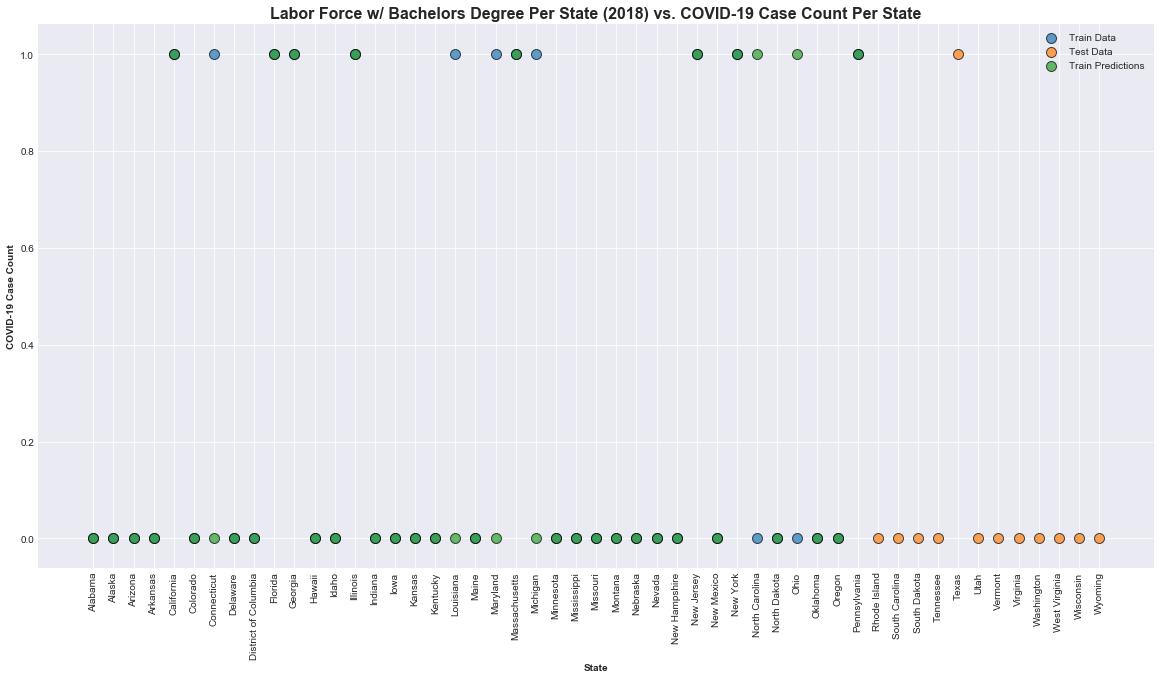

In [71]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Labor Force w/ Bachelors Degree Per State (2018) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

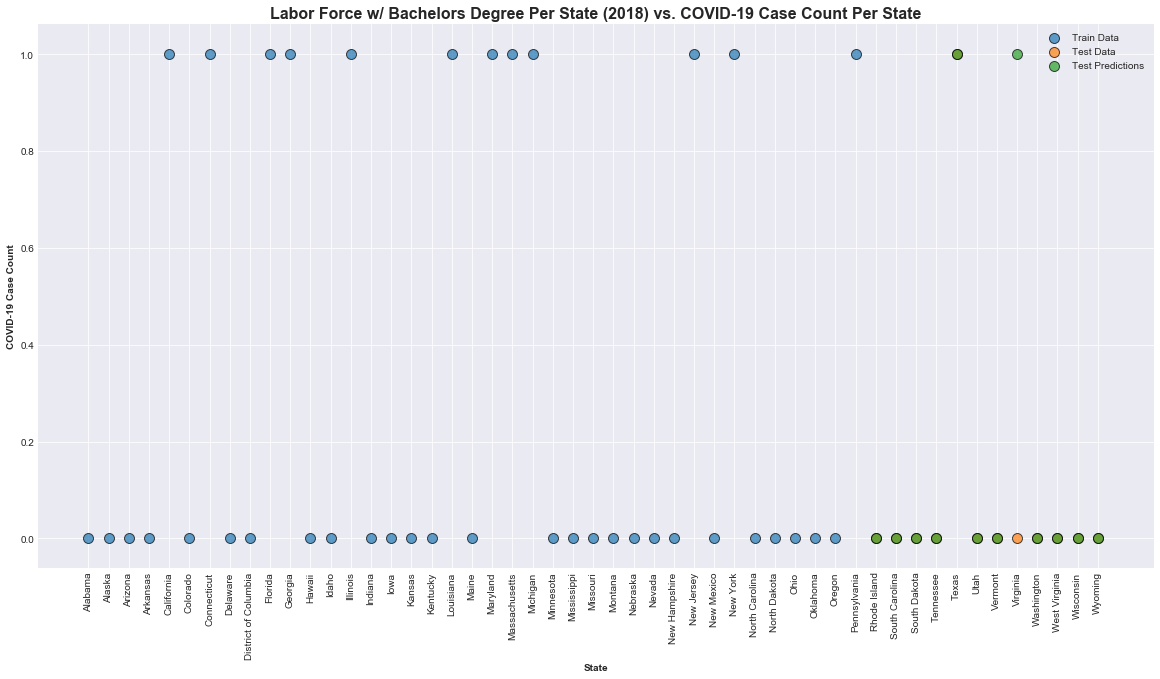

In [72]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Labor Force w/ Bachelors Degree Per State (2018) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [73]:
features_list = ['Total Doctorate Degrees 2018']
    
target = 'Cases_Avg'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

LogRegModel = LogisticRegression()
LogRegModel.fit(X_train_scaled, y_train)

train_predictions = LogRegModel.predict(X_train_scaled)
test_predictions = LogRegModel.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 0.0
MSE Value: 0.0
RMS Value: 0.0
R2 Score: 1.0


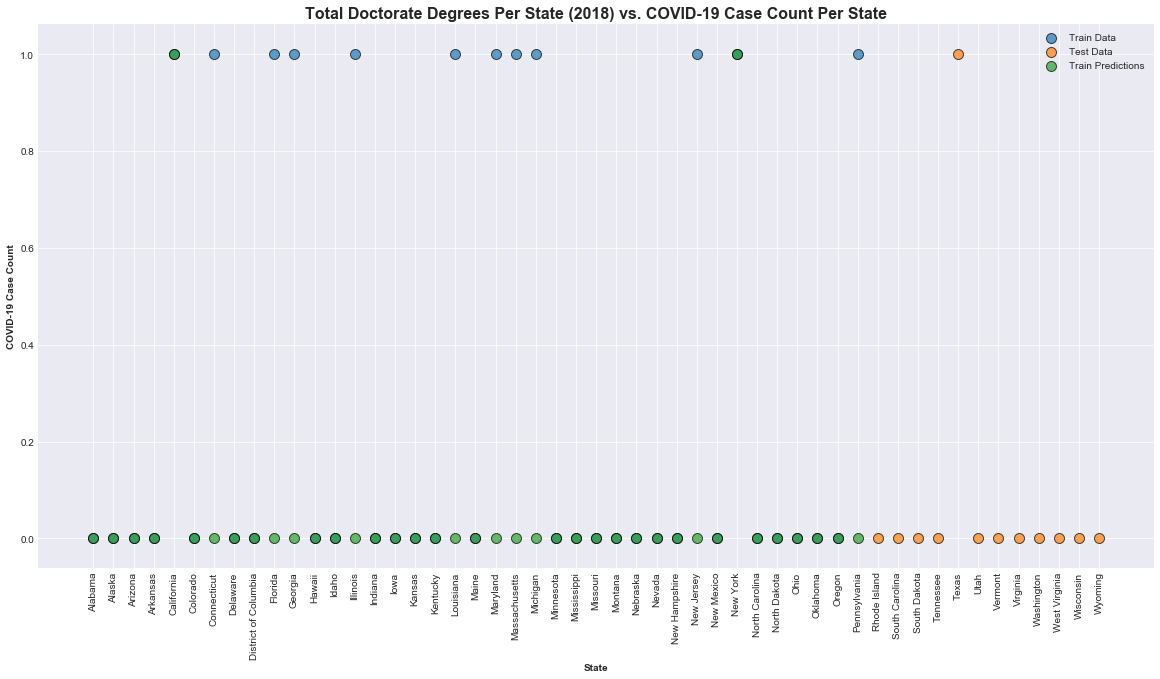

In [74]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Total Doctorate Degrees Per State (2018) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

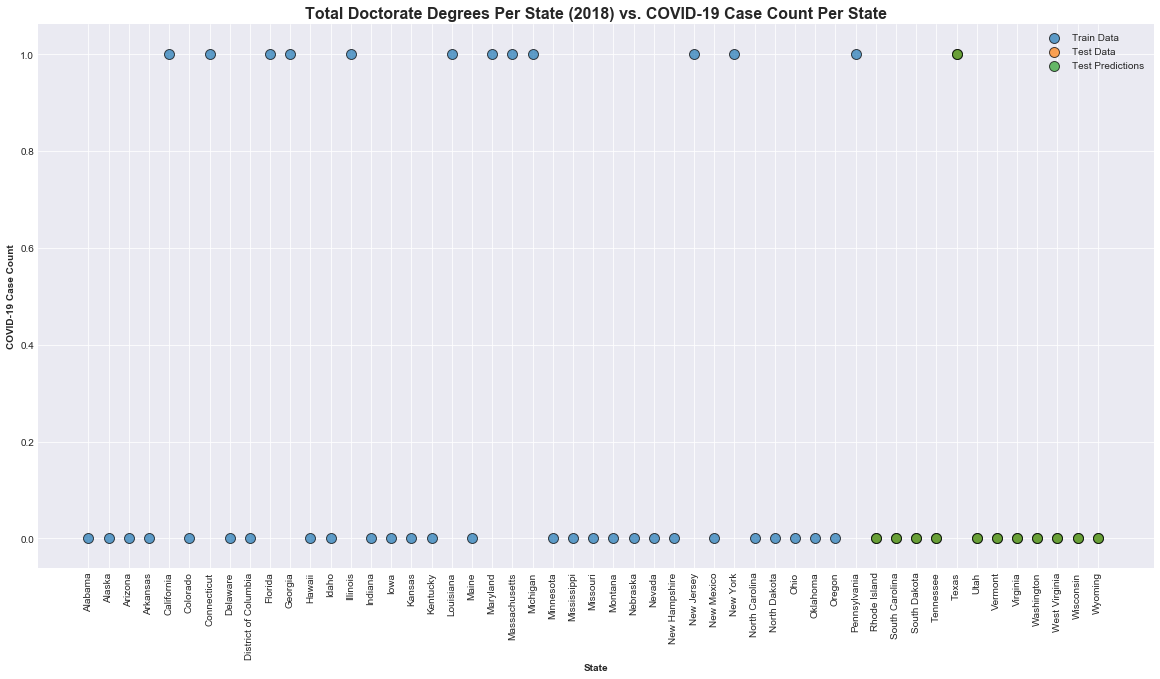

In [75]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Total Doctorate Degrees Per State (2018) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [76]:
features_list = ['Less Than HS Diploma 14-18']
    
target = 'Cases_Avg'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

LogRegModel = LogisticRegression()
LogRegModel.fit(X_train_scaled, y_train)

train_predictions = LogRegModel.predict(X_train_scaled)
test_predictions = LogRegModel.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 0.0
MSE Value: 0.0
RMS Value: 0.0
R2 Score: 1.0


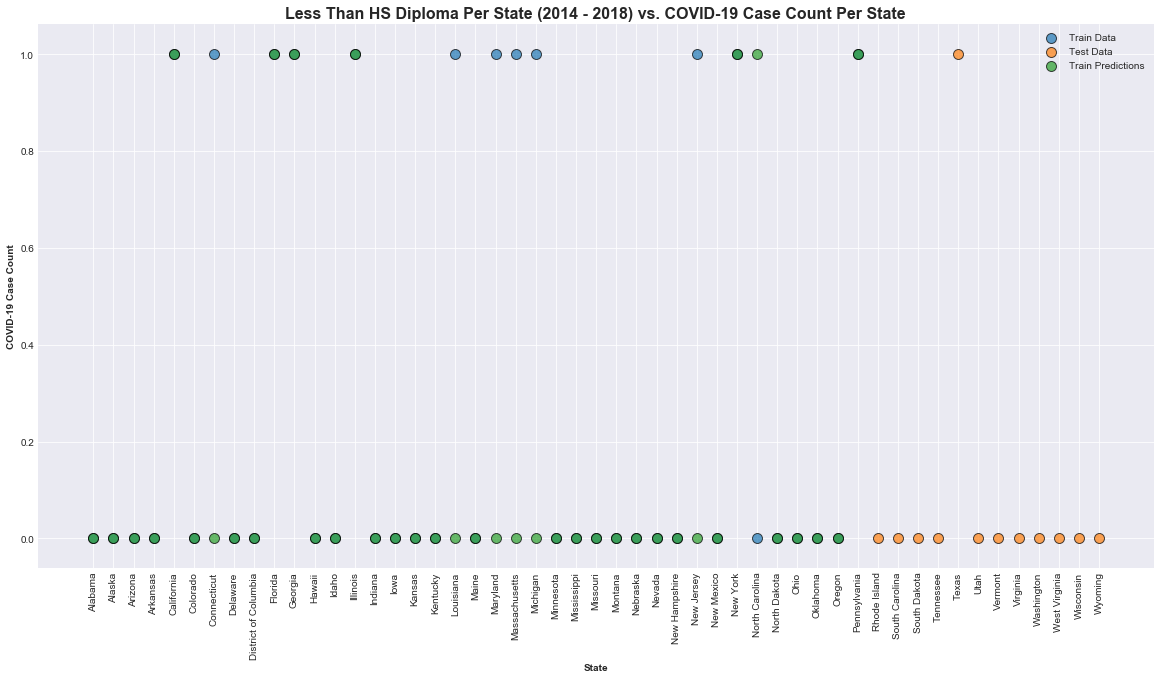

In [77]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Less Than HS Diploma Per State (2014 - 2018) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

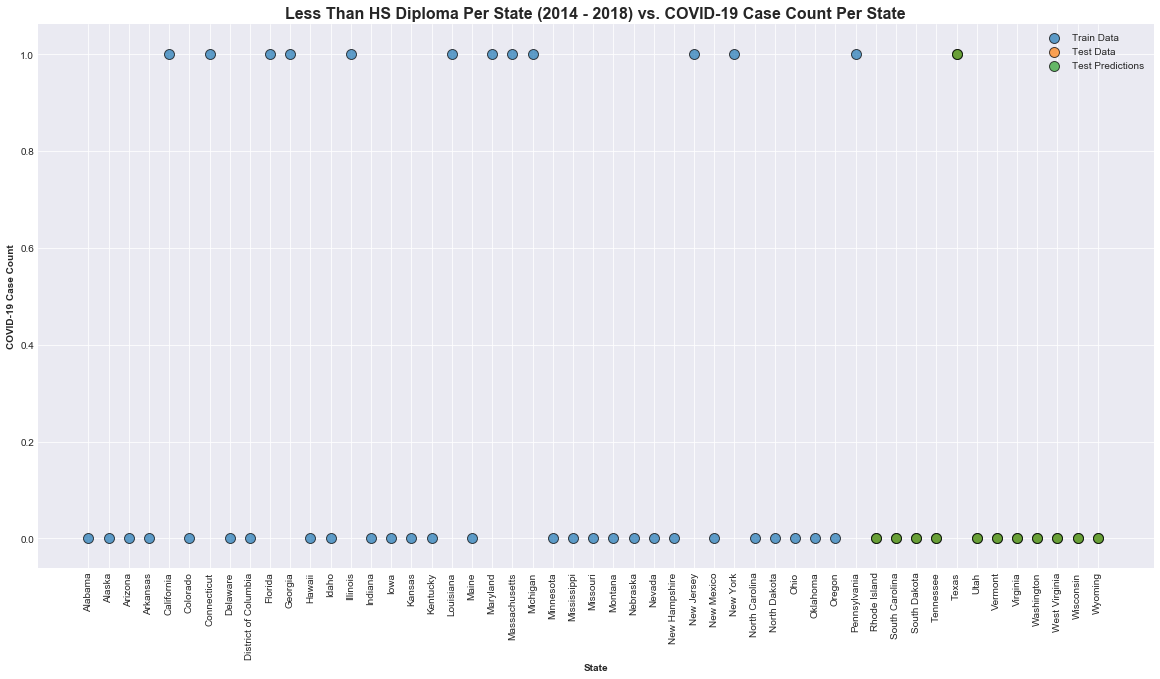

In [78]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Less Than HS Diploma Per State (2014 - 2018) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [79]:
features_list = ['HS Diploma 14-18']
    
target = 'Cases_Avg'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

LogRegModel = LogisticRegression()
LogRegModel.fit(X_train_scaled, y_train)

train_predictions = LogRegModel.predict(X_train_scaled)
test_predictions = LogRegModel.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 0.0
MSE Value: 0.0
RMS Value: 0.0
R2 Score: 1.0


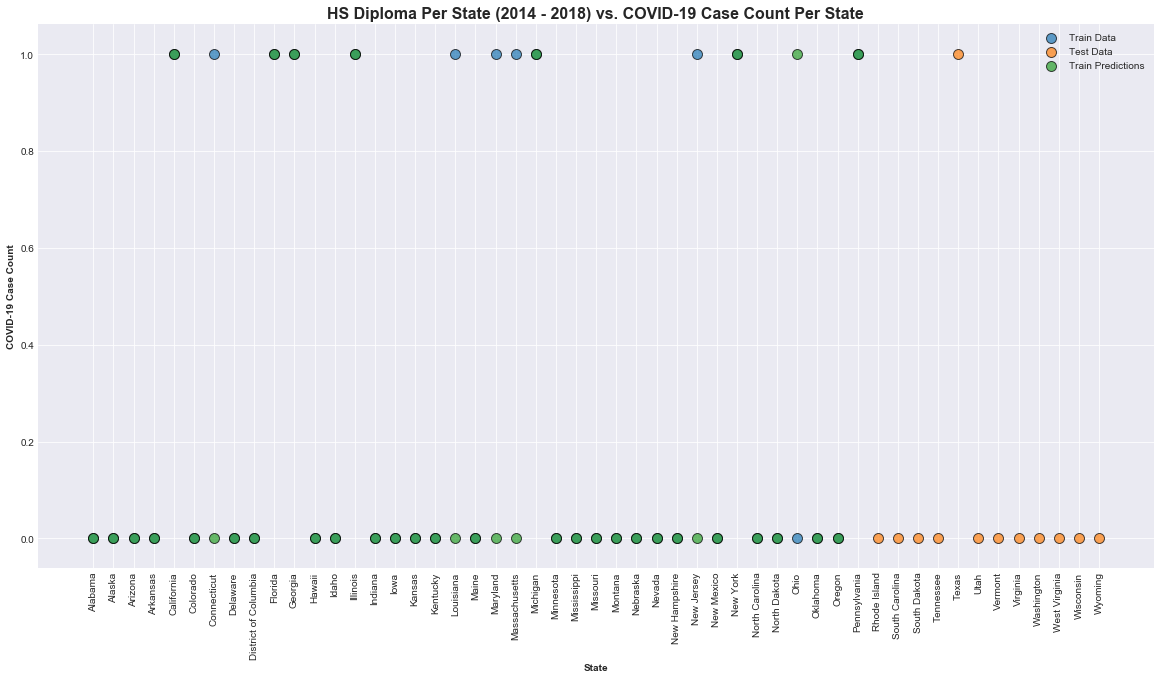

In [80]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('HS Diploma Per State (2014 - 2018) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

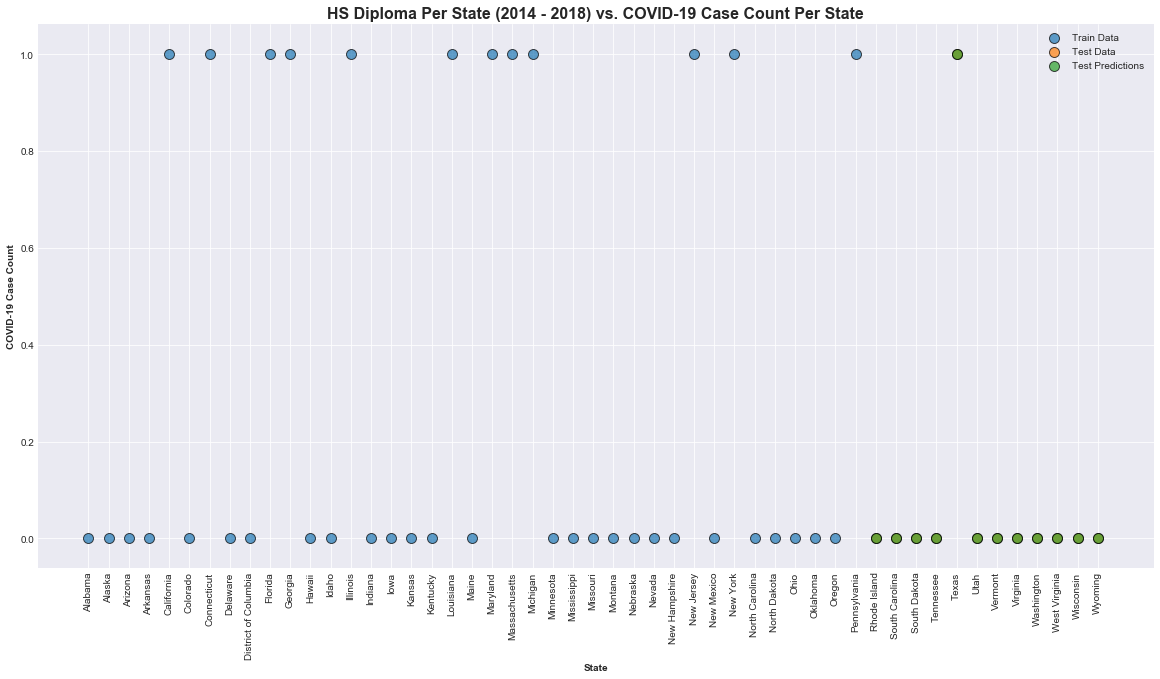

In [81]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('HS Diploma Per State (2014 - 2018) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [82]:
features_list = ['Some College or Associate Degree 14-18']
    
target = 'Cases_Avg'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

LogRegModel = LogisticRegression()
LogRegModel.fit(X_train_scaled, y_train)

train_predictions = LogRegModel.predict(X_train_scaled)
test_predictions = LogRegModel.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 0.0
MSE Value: 0.0
RMS Value: 0.0
R2 Score: 1.0


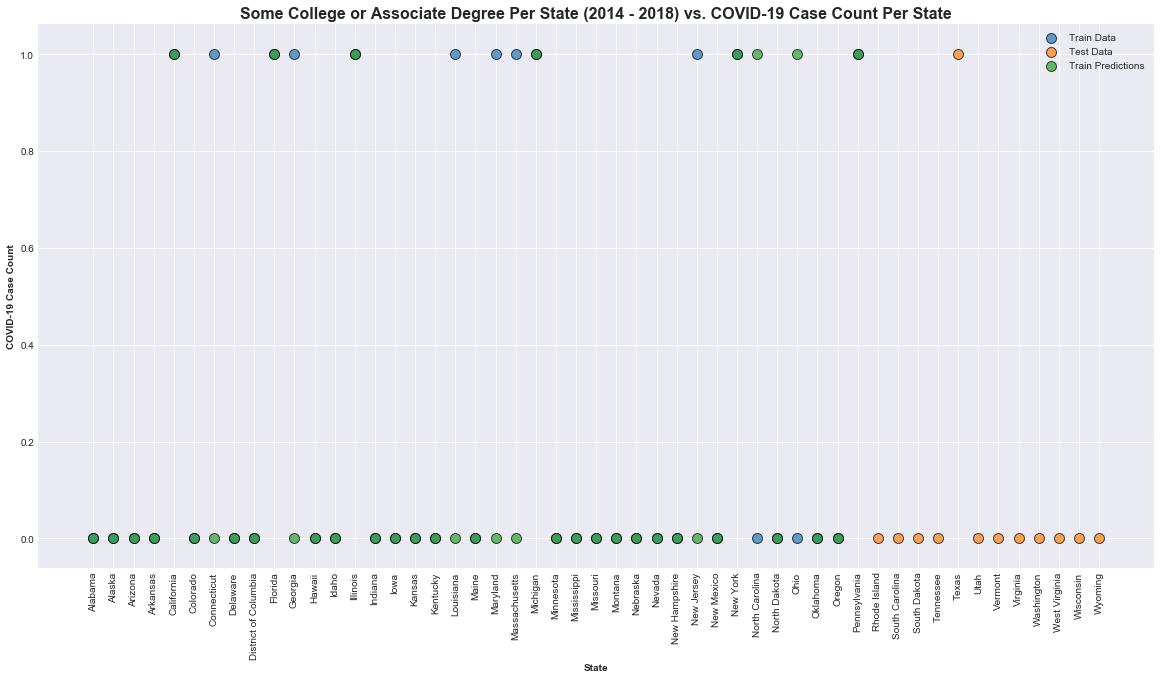

In [83]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Some College or Associate Degree Per State (2014 - 2018) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

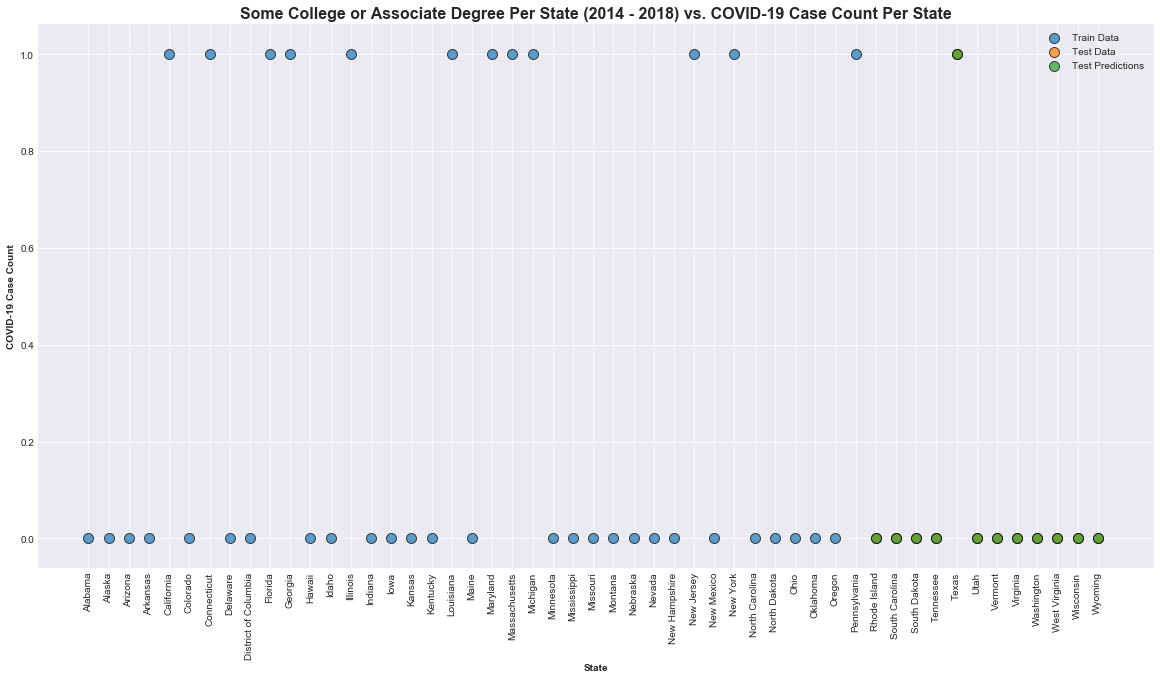

In [84]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Some College or Associate Degree Per State (2014 - 2018) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [85]:
features_list = ['Bachelor Degree or Higher 14-18']
    
target = 'Cases_Avg'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

LogRegModel = LogisticRegression()
LogRegModel.fit(X_train_scaled, y_train)

train_predictions = LogRegModel.predict(X_train_scaled)
test_predictions = LogRegModel.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 0.08333333333333333
MSE Value: 0.08333333333333333
RMS Value: 0.28867513459481287
R2 Score: -0.09090909090909127


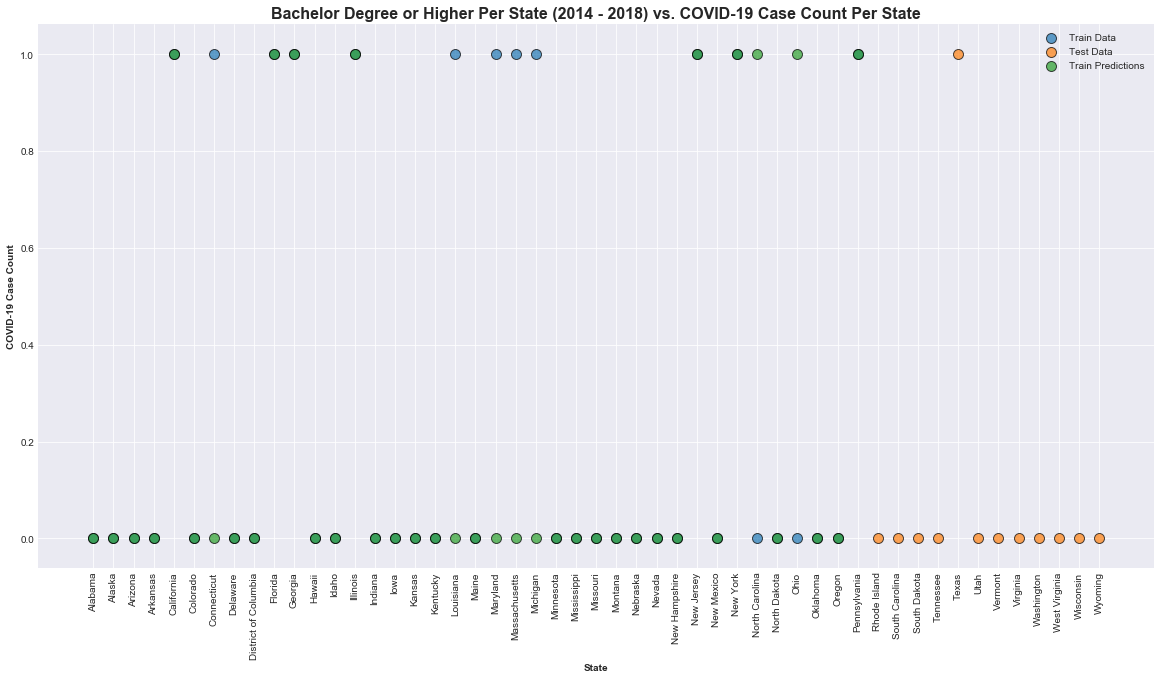

In [86]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Bachelor Degree or Higher Per State (2014 - 2018) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

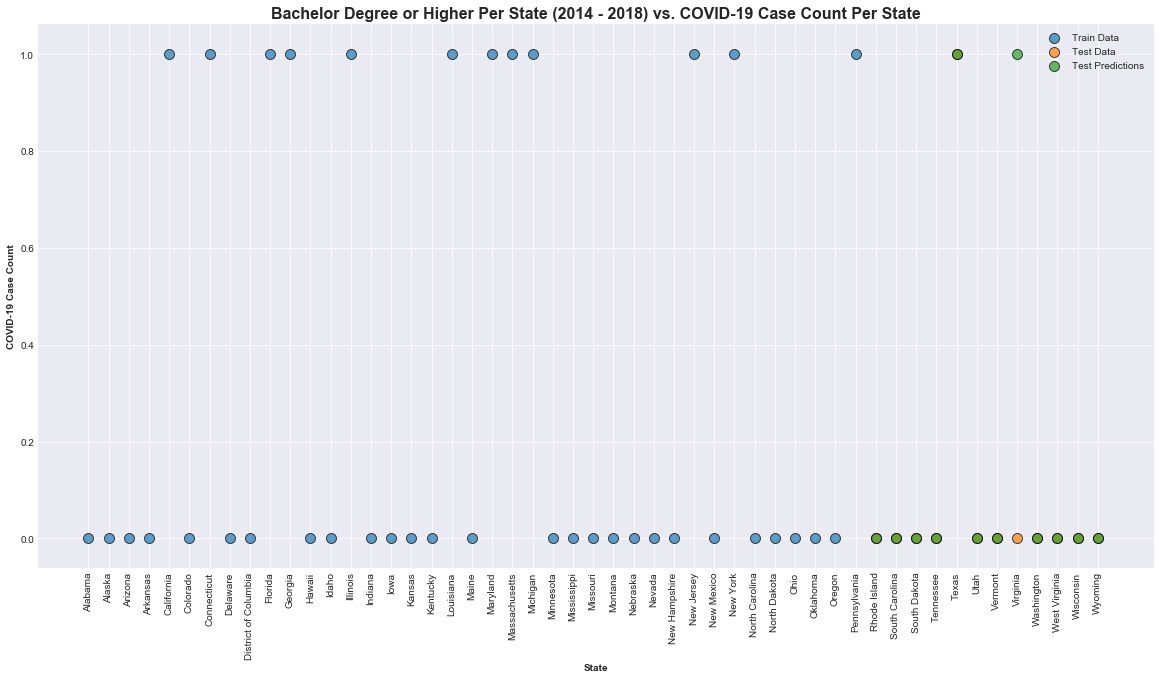

In [87]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Bachelor Degree or Higher Per State (2014 - 2018) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [88]:
features_list = ['ELL Students Enrolled 2017']
    
target = 'Cases_Avg'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

LogRegModel = LogisticRegression()
LogRegModel.fit(X_train_scaled, y_train)

train_predictions = LogRegModel.predict(X_train_scaled)
test_predictions = LogRegModel.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 0.0
MSE Value: 0.0
RMS Value: 0.0
R2 Score: 1.0


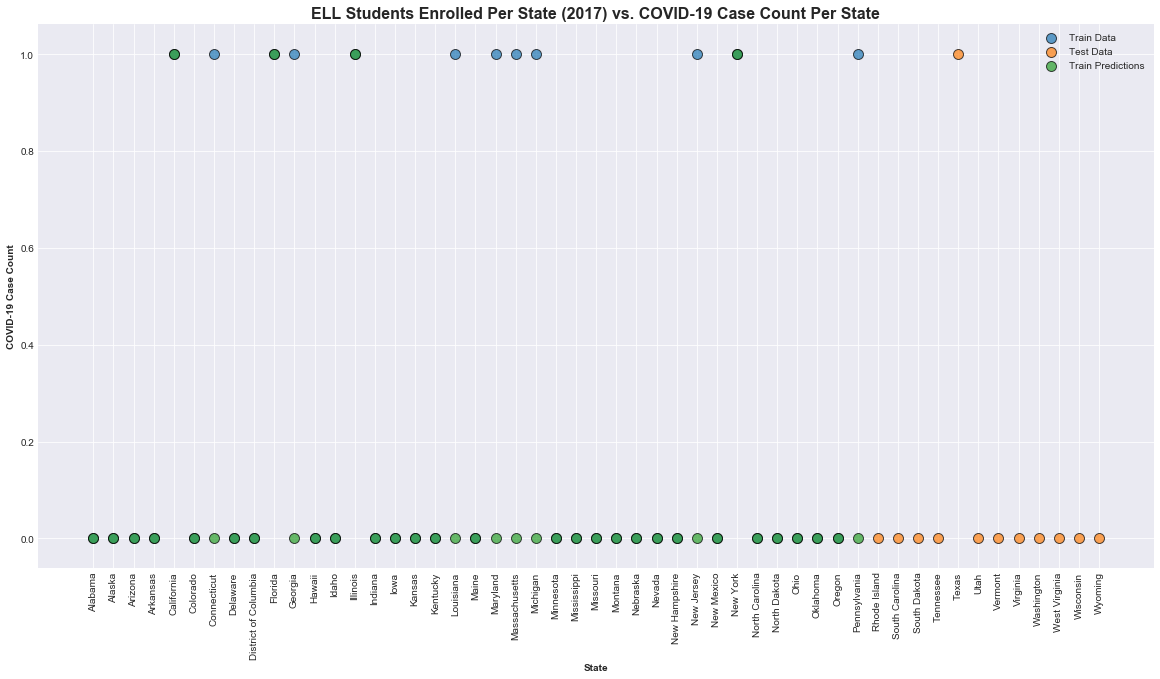

In [89]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('ELL Students Enrolled Per State (2017) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

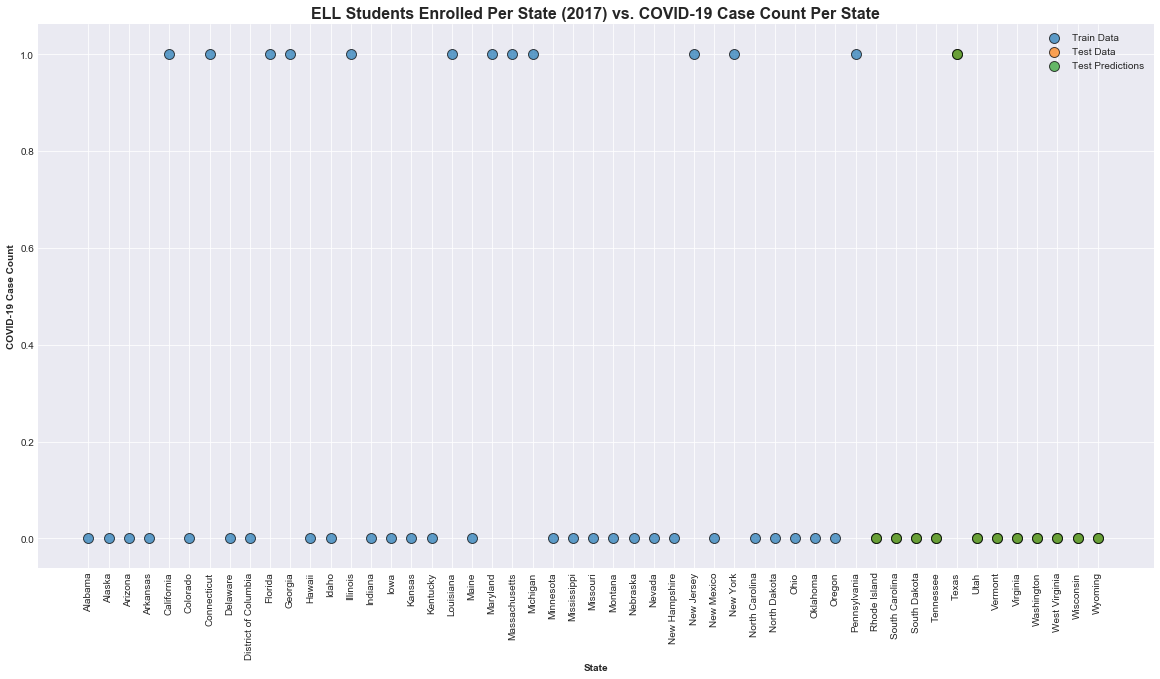

In [90]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('ELL Students Enrolled Per State (2017) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [91]:
features_list = ['4th 2015 Math', '4th 2015 Science', '8th 2015 Math',
                                       '8th 2015 Science', 'Labor Force w/ Bachelor 2018',
                                       'Total Doctorate Degrees 2018', 'Less Than HS Diploma 14-18',
                                       'HS Diploma 14-18', 'Some College or Associate Degree 14-18',
                                       'Bachelor Degree or Higher 14-18', 'ELL Students Enrolled 2017']
    
target = 'Cases_Avg'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LogRegModel = LogisticRegression()
LogRegModel.fit(X_train_scaled, y_train)

train_predictions = LogRegModel.predict(X_train_scaled)
test_predictions = LogRegModel.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 0.08333333333333333
MSE Value: 0.08333333333333333
RMS Value: 0.28867513459481287
R2 Score: -0.09090909090909127


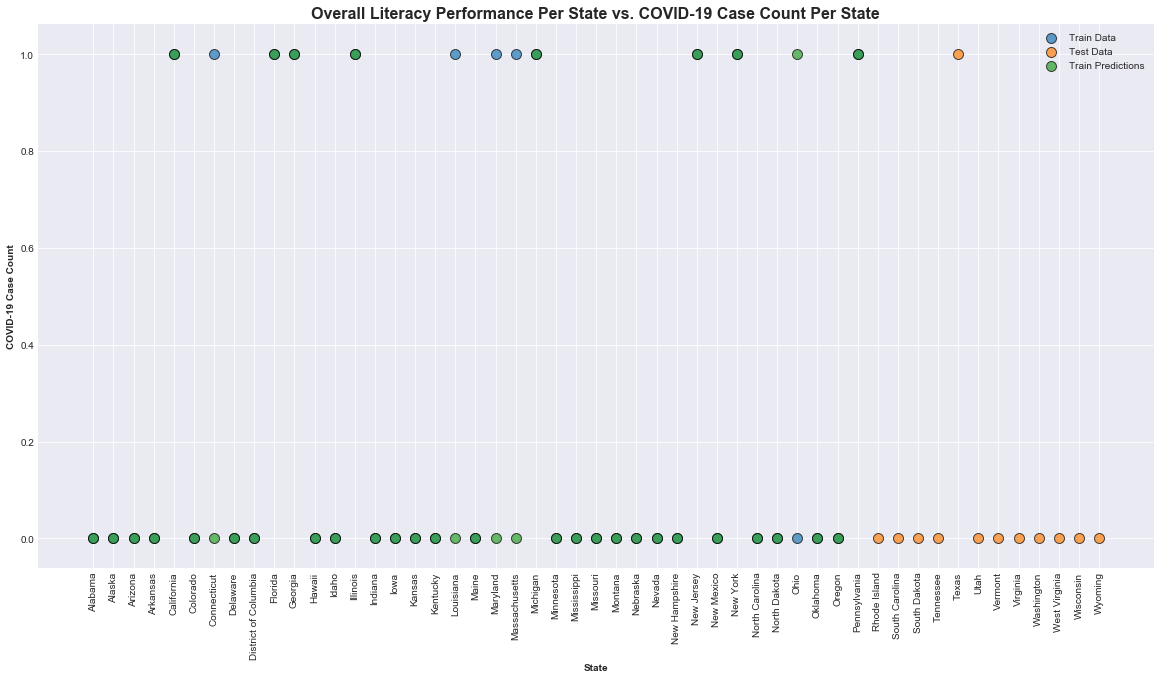

In [92]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Overall Literacy Performance Per State vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

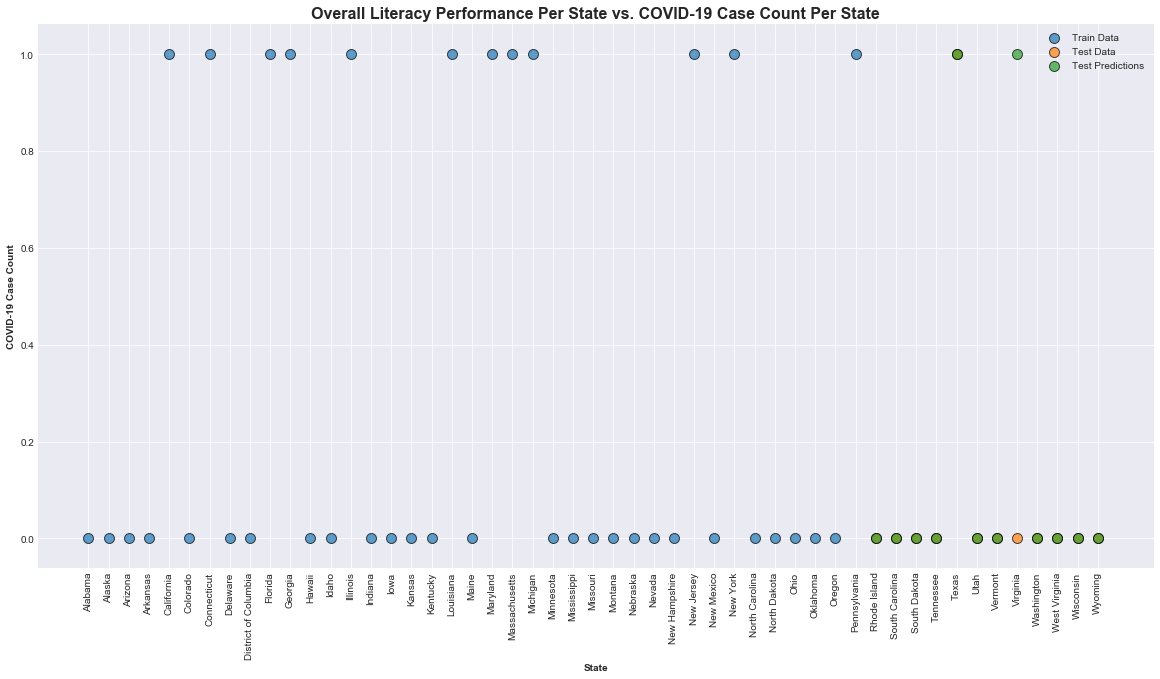

In [93]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Overall Literacy Performance Per State vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [94]:
features_list = ['4th 2015 Math', '4th 2015 Science', '8th 2015 Math',
                                       '8th 2015 Science']
    
target = 'Cases_Avg'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LogRegModel = LogisticRegression()
LogRegModel.fit(X_train_scaled, y_train)

train_predictions = LogRegModel.predict(X_train_scaled)
test_predictions = LogRegModel.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 0.08333333333333333
MSE Value: 0.08333333333333333
RMS Value: 0.28867513459481287
R2 Score: -0.09090909090909127


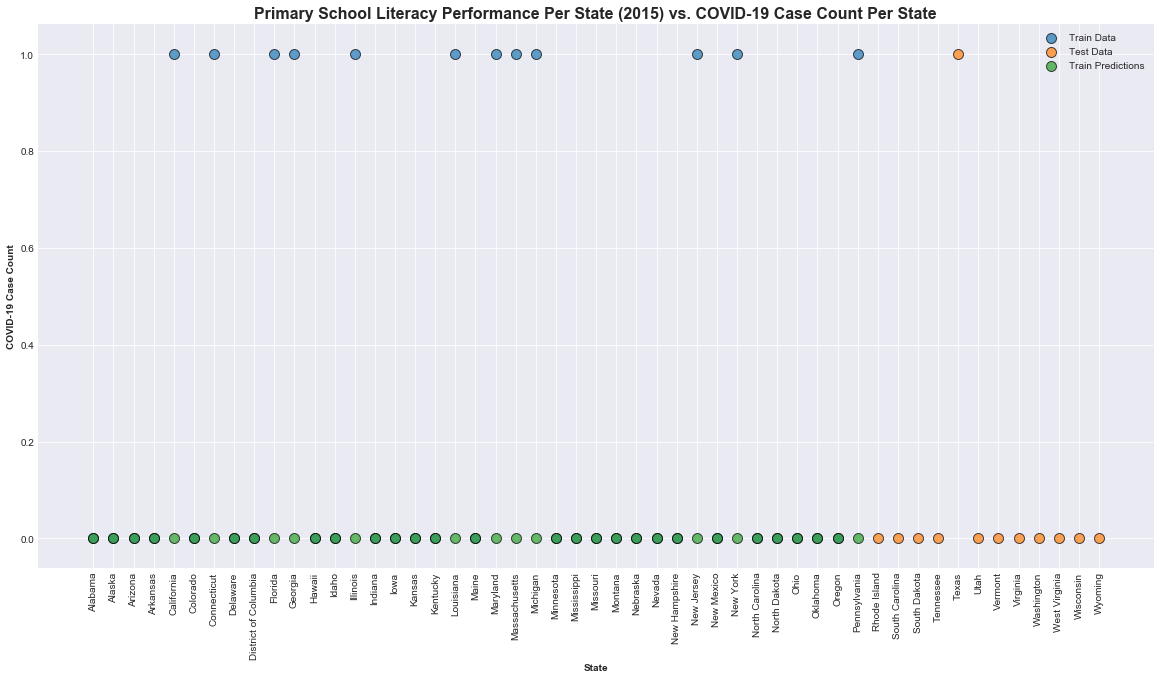

In [95]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Primary School Literacy Performance Per State (2015) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

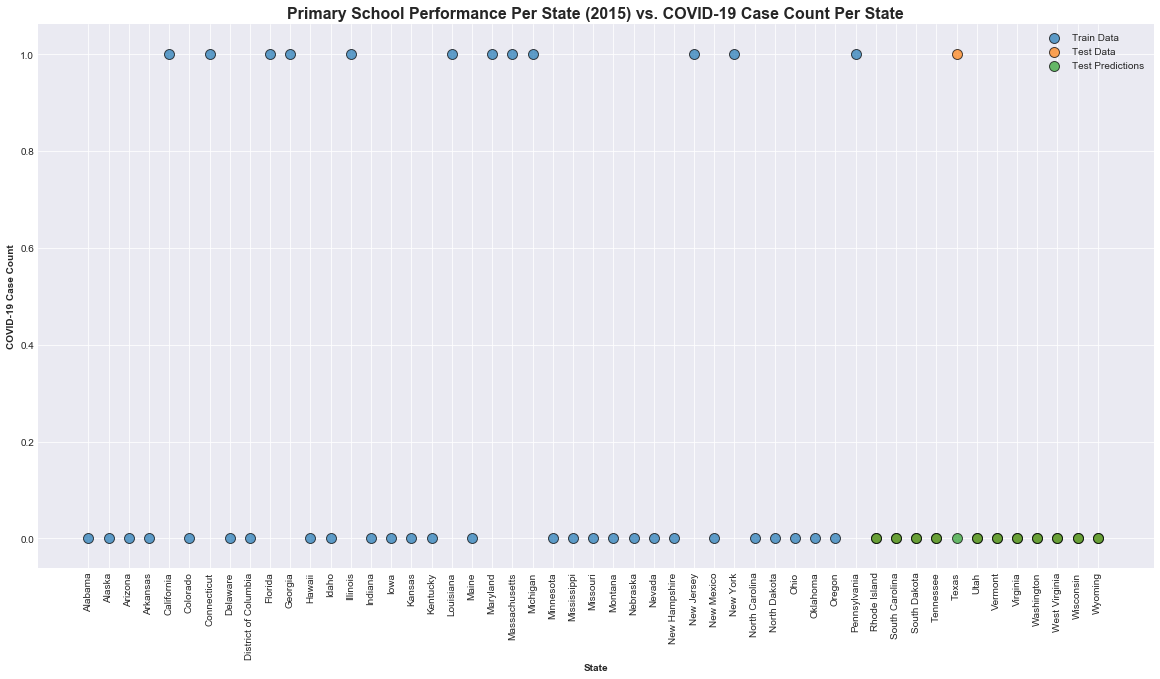

In [96]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Primary School Performance Per State (2015) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [97]:
features_list = ['Less Than HS Diploma 14-18', 'HS Diploma 14-18', 'Some College or Associate Degree 14-18',
                 'Bachelor Degree or Higher 14-18']
    
target = 'Cases_Avg'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LogRegModel = LogisticRegression()
LogRegModel.fit(X_train_scaled, y_train)

train_predictions = LogRegModel.predict(X_train_scaled)
test_predictions = LogRegModel.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 0.0
MSE Value: 0.0
RMS Value: 0.0
R2 Score: 1.0


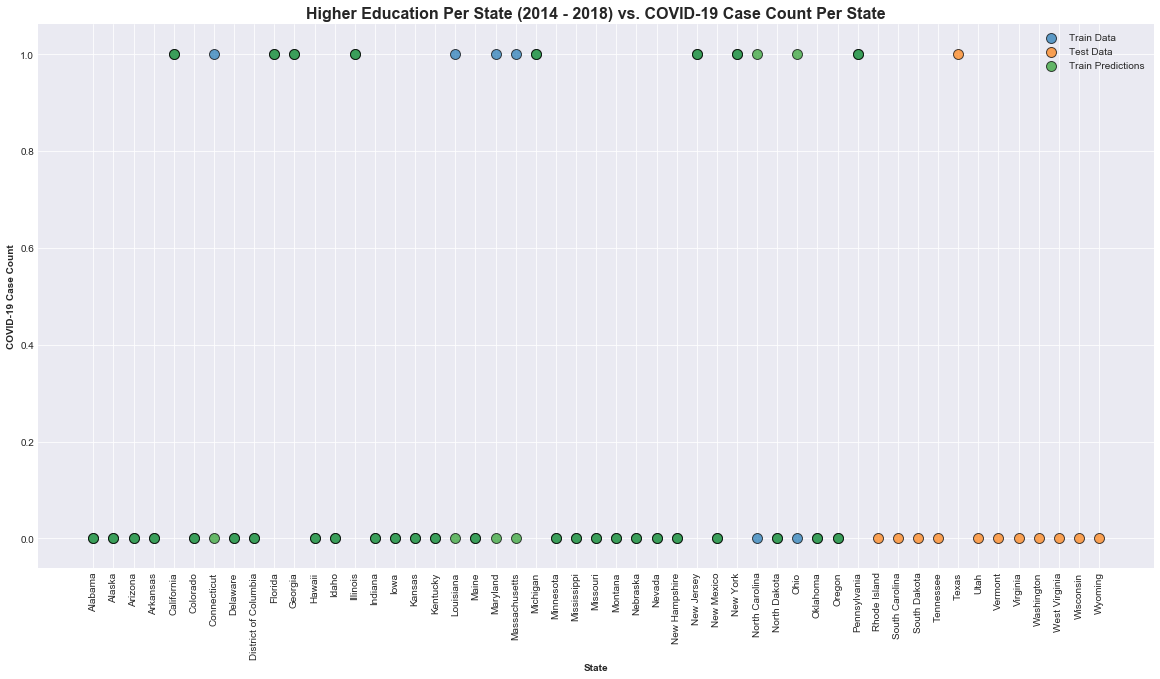

In [98]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Higher Education Per State (2014 - 2018) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

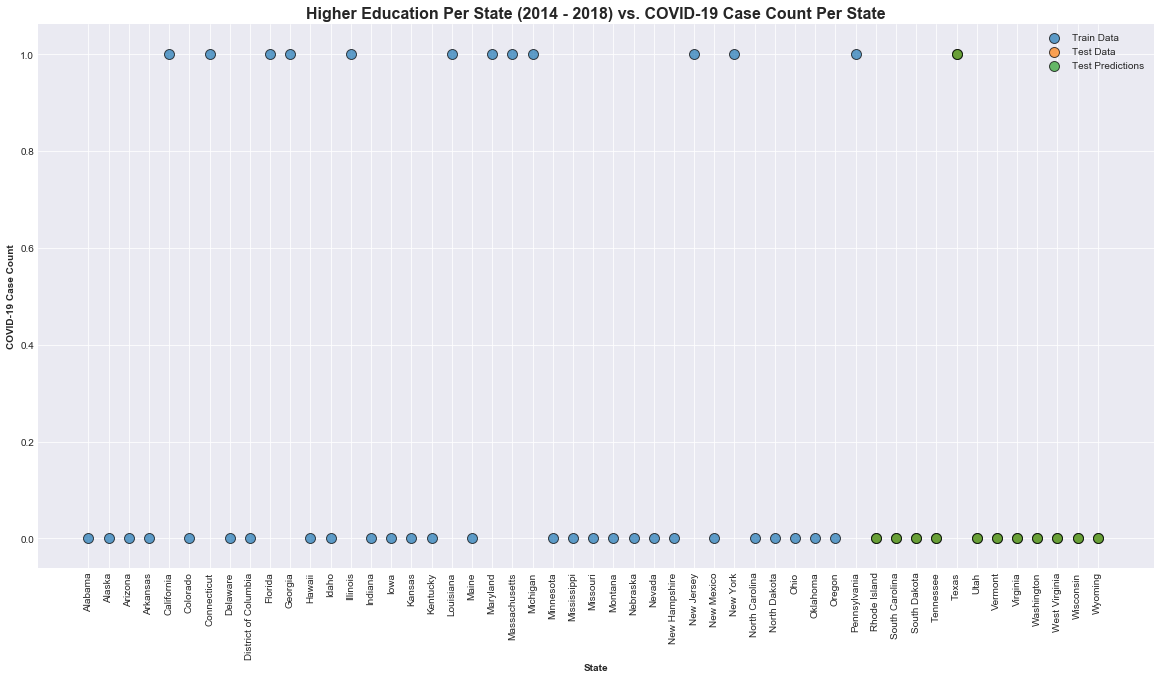

In [99]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Higher Education Per State (2014 - 2018) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();